# Set up 


In [ ]:
# Set Up 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import os
# change working directory
os.chdir('/Users/gerardogutierrez/Desktop/Academics/Spring_2026/plant-health-status/Notebooks')

pd.set_option('display.max_columns', None)  # Show all columns in DataFrame display

## Environmental Data

In [3]:
# environmental data - night
environmental_data_night = pd.read_excel('../Data/Ambient_nutrient_data.xlsx', header=2, usecols="A:H", nrows=119)

# environmental data - day
environmental_data_day = pd.read_excel('../Data/Ambient_nutrient_data.xlsx', header=2, usecols="K:R", nrows=236)
# strip ".1" ferom column names
environmental_data_day.columns = environmental_data_day.columns.str.replace('.1', '', regex=False)

# combine night and day and sort by timestamp
environmental_data = pd.concat(
    [environmental_data_night, environmental_data_day],
    axis=0,
    ignore_index=True
)

environmental_data.sort_values("DateTime", inplace=True)
environmental_data.reset_index(drop=True, inplace=True)
environmental_data['DateTime'] = pd.to_datetime(environmental_data['DateTime'])

# rename columns 
environmental_data.rename(columns={
    'Atlas CO2 (Carbon Dioxide Gas) (CH0, Carbon Dioxide, ppm)': 'Carbon Dioxide',
    'BME280 (CH0, Temperature, °C)': 'Temperature',
    'BME280 (CH1, Humidity, %)': 'Humidity',
    'BME280 (CH2, Pressure, Pa)': 'Pressure',
    'BME280 (CH3, Dewpoint, °C)': 'Dewpoint',
    'BME280 (CH4, Altitude, m)': 'Altitude',
    'BME280 (CH5, Vapor Pressure Deficit, Pa)': 'Vapor Pressure Deficit'
}, inplace=True)

# drop correlated columns and add day column 
def days_by_4(entry):
    if entry == 0:
        return 0
    elif entry in {1,2,3,4}:
        return 4
    elif entry in {5,6,7,8}:
        return 8
    elif entry in {9,10,11,12}:
        return 12
    elif entry in {13,14,15,16}:
        return 16
    elif entry in {17,18,19,20}:
        return 20
    elif entry in {21,22,23,24}:
        return 24
    elif entry in {25,26,27,28}:
        return 28

correlated_col_to_drop = ['Vapor Pressure Deficit', 'Dewpoint', 'Altitude']

env_df = environmental_data.copy()
day0_date = env_df['DateTime'].dt.floor('D').min()
env_df['Temp Days'] = (env_df['DateTime'].dt.floor('D') - day0_date).dt.days
env_df['Day'] = env_df['Temp Days'].apply(days_by_4)
env_df.drop(columns=['Temp Days'], inplace=True)
env_df.drop(columns=correlated_col_to_drop, inplace=True)
env_df.head(30)



DateTime  Carbon Dioxide  Temperature  Humidity  Pressure  Day
0  2025-10-14 01:25:06           450.0        21.69     69.39  98718.64    0
1  2025-10-14 03:22:52           443.0        21.70     69.51  98701.92    0
2  2025-10-14 05:20:38           442.0        21.77     69.71  98659.95    0
3  2025-10-14 07:18:24           447.0        23.04     58.17  98637.33    0
4  2025-10-14 09:16:10           452.0        23.17     59.50  98682.71    0
5  2025-10-14 11:13:56           459.0        22.96     58.68  98735.68    0
6  2025-10-14 13:11:42           443.0        23.03     58.13  98852.73    0
7  2025-10-14 15:09:28           445.0        23.06     59.19  98887.73    0
8  2025-10-14 17:07:14           449.0        23.05     59.10  98926.89    0
9  2025-10-14 19:05:00           460.0        23.06     59.11  99015.84    0
10 2025-10-14 21:02:46           547.0        23.08     59.68  99093.39    0
11 2025-10-14 23:00:32           498.0        20.73     68.56  99148.46    0
12 2025-10-15 00:58:18           480.0        20.16     72.02  99181.40    4
13 2025-10-15 02:56:04           434.0        19.86     72.58  99196.23    4
14 2025-10-15 04:53:50           431.0        19.64     73.39  99150.47    4
15 2025-10-15 06:51:36           463.0        23.13     68.05  99182.46    4
16 2025-10-15 08:49:22           499.0        23.40     62.69  99236.28    4
17 2025-10-15 10:47:08           478.0        23.23     60.99  99290.32    4
18 2025-10-15 12:44:54           462.0        23.05     59.81  99266.72    4
19 2025-10-15 14:42:40           457.0        23.03     58.16  99133.29    4
20 2025-10-15 16:40:26           466.0        23.10     57.99  99077.65    4
21 2025-10-15 18:38:12           458.0        23.08     57.74  99071.30    4
22 2025-10-15 20:35:58           470.0        23.07     57.47  99145.39    4
23 2025-10-15 22:33:44           472.0        21.84     68.40  99173.22    4
24 2025-10-16 00:31:30           484.0        21.78     69.47  99195.34    4
25 2025-10-16 02:29:16           497.0        21.43     70.64  99159.84    4
26 2025-10-16 04:27:02           499.0        21.12     72.27  99076.42    4
27 2025-10-16 06:24:48           513.0        22.21     68.02  99022.53    4
28 2025-10-16 08:22:34           526.0        23.12     59.22  99017.17    4
29 2025-10-16 10:20:20           525.0        23.15     59.25  99060.10    4

4 Day Averages of Environmental Data

In [4]:
# mean dataframe for environmental data 
mean_env_df = (env_df
               .drop(columns=['DateTime'])
               .groupby('Day').mean().reset_index()
)
mean_env_df

Day  Carbon Dioxide  Temperature   Humidity      Pressure
0    0      461.250000    22.528333  62.394167  98838.439167
1    4      487.000000    22.425714  62.214082  99060.374490
2    8      514.051020    22.520816  65.247347  99282.511633
3   12      503.693878    21.764694  62.327755  99235.894082
4   16      496.816327    22.316327  53.725918  99111.638367
5   20      532.357143    22.804490  52.372857  99187.103673
6   24      500.326531    22.005102  67.333265  99373.720000
7   28      511.530612    22.304286  71.859592  99342.587347

### Actu

In [5]:
env_actuator_night_data = pd.read_excel('../Data/Ambient_nutrient_data.xlsx',sheet_name='Environmental Data', header=2, usecols="Y:AD", nrows=320)

env_actuator_night_data.rename(columns={
    'DateTime.2': 'DateTime',
    'LIGHT-22 (CH0, Duration, s)': 'LIGHT Duration',
    'AC-5 (CH0, Duration, s)': 'AC Duration',
    'EXHAUST-17 (CH0, Duration, s)': 'EXHAUST Duration',
    'HUMIDIFIER-23 (CH0, Duration, s)': 'HUMIDIFIER Duration',
    'HEATER-6 (CH0, Duration, s)': 'HEATER Duration'
}, inplace=True)

env_actuator_day_data = pd.read_excel('../Data/Ambient_nutrient_data.xlsx',sheet_name='Environmental Data', header=2, usecols="AF:AK", nrows=778)

env_actuator_day_data.rename(columns={
    'DateTime.3': 'DateTime',
    'LIGHT-22 (CH0, Duration, s).1': 'LIGHT Duration',
    'AC-5 (CH0, Duration, s).1': 'AC Duration',
    'EXHAUST-17 (CH0, Duration, s).1': 'EXHAUST Duration',
    'HUMIDIFIER-23 (CH0, Duration, s).1': 'HUMIDIFIER Duration',
    'HEATER-6 (CH0, Duration, s).1': 'HEATER Duration'
}, inplace=True)

# concatenate night and day
env_actuator_data = pd.concat([env_actuator_night_data, env_actuator_day_data], axis=0, ignore_index=True)

env_actuator_data['DateTime'] = pd.to_datetime(env_actuator_data['DateTime'])
env_actuator_data = env_actuator_data.sort_values(by='DateTime').reset_index(drop=True)
env_actuator_data.fillna(0, inplace=True)

# three floating points
env_actuator_data = env_actuator_data.round(3)
env_actuator_df = env_actuator_data.copy()
env_actuator_df

DateTime  LIGHT Duration  AC Duration  EXHAUST Duration  \
0    2025-10-14 00:21:44             0.0      360.000             0.000   
1    2025-10-14 00:35:37             0.0        0.000            60.035   
2    2025-10-14 01:11:24             0.0        0.000             0.000   
3    2025-10-14 02:19:28             0.0      360.000             0.000   
4    2025-10-14 02:33:18             0.0        0.000            60.027   
...                  ...             ...          ...               ...   
1093 2025-11-11 21:55:31             0.0        0.000            59.992   
1094 2025-11-11 21:59:20             0.0       60.039             0.000   
1095 2025-11-11 22:37:12             0.0        0.000             0.000   
1096 2025-11-11 23:53:12             0.0        0.000            59.985   
1097 2025-11-11 23:57:04             0.0        0.000             0.000   

      HUMIDIFIER Duration  HEATER Duration  
0                   0.000              0.0  
1                   0.000              0.0  
2                   0.000              0.0  
3                   0.000              0.0  
4                   0.000              0.0  
...                   ...              ...  
1093               59.993              0.0  
1094                0.000              0.0  
1095                0.000              0.0  
1096                0.000              0.0  
1097                0.000              0.0  

[1098 rows x 6 columns]

## Nutrient Data

In [6]:
# nutrient data sensor input 
nutrient_data = pd.read_excel('../Data/Ambient_nutrient_data.xlsx', sheet_name='Nutrient Data', header=1, usecols = "A:I", nrows=355)

# drop specific gravity column 
nutrient_data.drop(columns=['Atlas EC (CH3, Specific Gravity)'], inplace=True)

# rename columns
nutrient_data.rename(columns={
    'Atlas pH (CH0, Ion Concentration, pH)': 'Ion Concentration',
    'Atlas EC (CH0, Electrical Conductivity, μS/cm)': 'Electrical Conductivity',
    'Atlas EC (CH1, Total Dissolved Solids, ppm)': 'Total Dissolved Solids',
    'Atlas EC (CH2, Salinity, ppt)': 'Salinity',
    'Atlas Flow Meter (CH0, Volume, l)': 'Volume',
    'Atlas PT-1000 (CH0, Temperature, °C)': 'Temperature',
    'Atlas Flow Meter (CH1, Volume Flow Rate, l/min)': 'Volume Flow Rate'
}, inplace=True)
nutrient_data['DateTime'] = pd.to_datetime(nutrient_data['DateTime'])

# drop redundant columns
correlated_col_to_drop = ['Ion Concentration','Salinity', 'Total Dissolved Solids']
nutrient_data.drop(columns=correlated_col_to_drop, inplace=True)


nutr_df = nutrient_data.copy()
nutr_df['Temp Days'] = (nutr_df['DateTime'].dt.floor('D') - day0_date).dt.days
nutr_df['Day'] = nutr_df['Temp Days'].apply(days_by_4)
nutr_df.head(30)
nutr_df.drop(columns=[ 'Temp Days'], inplace=True)

nutr_df


DateTime  Electrical Conductivity   Volume  Temperature  \
0   2025-10-14 01:25:06                   1281.5  259.585      23.4740   
1   2025-10-14 03:22:52                   1282.0  397.410      23.4280   
2   2025-10-14 05:20:38                   1282.0  534.035      23.3830   
3   2025-10-14 07:18:24                   1284.0  671.860      23.6310   
4   2025-10-14 09:16:10                   1294.0  801.315      23.8435   
..                  ...                      ...      ...          ...   
350 2025-11-11 15:23:26                   1904.0    0.000      31.4610   
351 2025-11-11 17:21:12                   1851.0    0.000      29.0245   
352 2025-11-11 19:18:58                   1847.5    0.000      27.6360   
353 2025-11-11 21:16:44                   1832.0    0.000      26.5760   
354 2025-11-11 23:14:30                   1828.0    0.000      25.5790   

     Volume Flow Rate  Day  
0                1.16    0  
1                1.16    0  
2                1.16    0  
3                1.16    0  
4                1.16    0  
..                ...  ...  
350              0.00   28  
351              0.00   28  
352              0.00   28  
353              0.00   28  
354              0.00   28  

[355 rows x 6 columns]

4 Day averages for Nutrient Data

In [7]:
# mean dataframe for nutrient data 
mean_nutr_df = (nutr_df
                .drop(columns=['DateTime'])
                .groupby('Day').mean().reset_index()
)

mean_nutr_df

Day  Electrical Conductivity        Volume  Temperature  Volume Flow Rate
0    0              1300.625000   1010.277917    23.835208          1.160000
1    4              1361.010204   5132.698163    23.987102          1.157143
2    8              1521.816327  11551.277959    25.308837          1.087551
3   12              1551.622449  17751.971224    24.544541          1.087143
4   16              1699.387755  24206.932143    25.323561          1.159184
5   20              1668.877551  19444.102449    23.349337          1.154388
6   24              2112.959184   2358.132449    25.973663          1.082041
7   28              1943.295918    550.176327    26.928286          0.213673

### Actuator Data

In [8]:
# nutrient actuator data

nutr_actuator_data = pd.read_excel('../Data/Ambient_nutrient_data.xlsx', sheet_name='Nutrient Data', header=1, usecols = "Q:V", nrows=1098)

nutr_actuator_data.rename(columns={
    'DateTime.1': 'DateTime',
    'pH UP (CH1, Duration, s)': 'pH Up Duration',
    'PUMP-27 (CH0, Duration, s)': 'PUMP Duration',
    'pH DOWN (CH1, Duration, s)': 'pH Down Duration',
    'Nutrient A+B (CH1, Duration, s)': 'Nutrient AB Duration',
    'Nutrient C (CH1, Duration, s)': 'Nutrient C Duration'
}, inplace=True)


nutr_actuator_data.fillna(0, inplace=True)
nutr_actuator_data['DateTime'] = pd.to_datetime(nutr_actuator_data['DateTime'])

# three floating points
nutr_actuator_data = nutr_actuator_data.round(3)
nutr_actuator_df = nutr_actuator_data.copy()
nutr_actuator_df

DateTime  pH Up Duration  PUMP Duration  pH Down Duration  \
0    2025-10-14 00:21:44            0.00            0.0               0.0   
1    2025-10-14 00:35:37            0.00            0.0               0.0   
2    2025-10-14 01:11:24            0.00            0.0               0.0   
3    2025-10-14 02:19:28            0.00            0.0               0.0   
4    2025-10-14 02:33:18            0.00            0.0               0.0   
...                  ...             ...            ...               ...   
1093 2025-11-11 21:55:31           60.14            0.0               0.0   
1094 2025-11-11 21:59:20            0.00            0.0               0.0   
1095 2025-11-11 22:37:12            0.00            0.0               0.0   
1096 2025-11-11 23:53:12            0.00            0.0               0.0   
1097 2025-11-11 23:57:04            0.00            0.0               0.0   

      Nutrient AB Duration  Nutrient C Duration  
0                      0.0                  0.0  
1                      0.0                  0.0  
2                      0.0                  0.0  
3                      0.0                  0.0  
4                      0.0                  0.0  
...                    ...                  ...  
1093                   0.0                  0.0  
1094                   0.0                  0.0  
1095                   0.0                  0.0  
1096                   0.0                 10.0  
1097                   0.0                  0.0  

[1098 rows x 6 columns]

## Lettuce Weights

In [9]:
lettuce_weights = pd.read_excel('../Data/Lettuce_FW_EC_Tracker_v3_2_.xlsx', sheet_name='Targets', header=26, usecols="A:D", nrows=9)

# add delta column
lettuce_weights['Change in Fresh Weight'] = lettuce_weights['Median Net Fresh Weight'].diff().fillna(0)
lettuce_weights.drop(columns=['Date'], inplace=True)

lettuce_weights

Day  Median Net Fresh Weight  Target Fresh Weight  Change in Fresh Weight
0    0                      4.7                  3.5                     0.0
1    4                     13.1                  8.8                     8.4
2    8                     19.8                 22.2                     6.7
3   12                     27.3                 56.0                     7.5
4   16                     42.3                 98.8                    15.0
5   20                     80.8                141.5                    38.5
6   24                    139.3                184.3                    58.5
7   28                    219.8                227.0                    80.5

# Cross Correlation

## Environmental Data Cross Correlation

In [17]:
lettuce_weights

Day  Median Net Fresh Weight  Target Fresh Weight  Change in Fresh Weight
0    0                      4.7                  3.5                     0.0
1    4                     13.1                  8.8                     8.4
2    8                     19.8                 22.2                     6.7
3   12                     27.3                 56.0                     7.5
4   16                     42.3                 98.8                    15.0
5   20                     80.8                141.5                    38.5
6   24                    139.3                184.3                    58.5
7   28                    219.8                227.0                    80.5

In [18]:
mean_env_df

Day  Carbon Dioxide  Temperature   Humidity      Pressure
0    0      461.250000    22.528333  62.394167  98838.439167
1    4      487.000000    22.425714  62.214082  99060.374490
2    8      514.051020    22.520816  65.247347  99282.511633
3   12      503.693878    21.764694  62.327755  99235.894082
4   16      496.816327    22.316327  53.725918  99111.638367
5   20      532.357143    22.804490  52.372857  99187.103673
6   24      500.326531    22.005102  67.333265  99373.720000
7   28      511.530612    22.304286  71.859592  99342.587347

In [19]:
from statsmodels.tsa.stattools import ccf

for col in ['Carbon Dioxide', 'Temperature']:
    cross_corr = ccf(mean_env_df[col],
                     lettuce_weights['Change in Fresh Weight'])
    print(col, cross_corr[:3])


Carbon Dioxide [ 0.45919374  0.02869411 -0.25008244]
Temperature [-0.08987838 -0.07656291  0.00558035]


In [20]:
mean_env_df

Day  Carbon Dioxide  Temperature   Humidity      Pressure
0    0      461.250000    22.528333  62.394167  98838.439167
1    4      487.000000    22.425714  62.214082  99060.374490
2    8      514.051020    22.520816  65.247347  99282.511633
3   12      503.693878    21.764694  62.327755  99235.894082
4   16      496.816327    22.316327  53.725918  99111.638367
5   20      532.357143    22.804490  52.372857  99187.103673
6   24      500.326531    22.005102  67.333265  99373.720000
7   28      511.530612    22.304286  71.859592  99342.587347

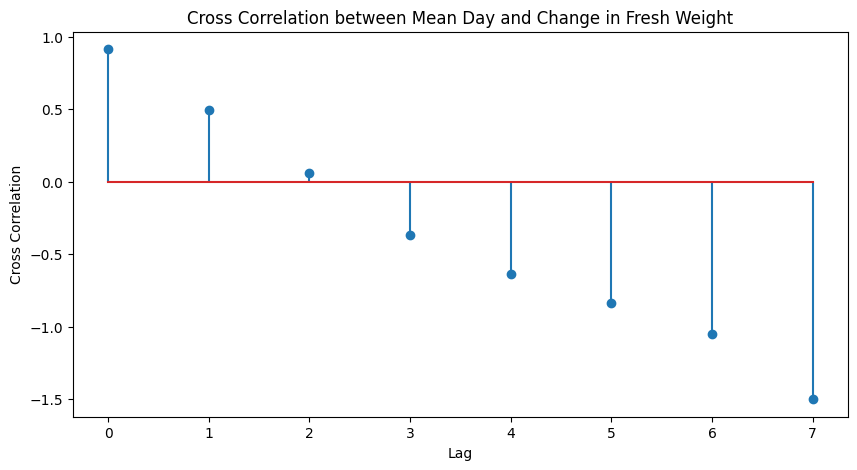

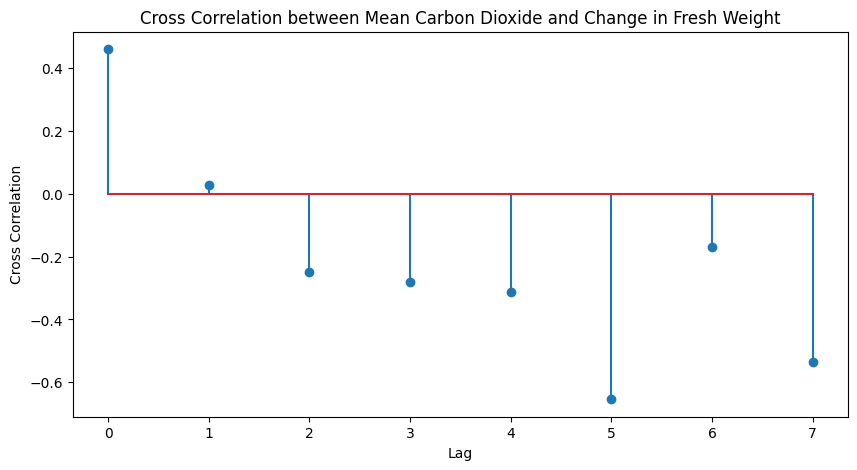

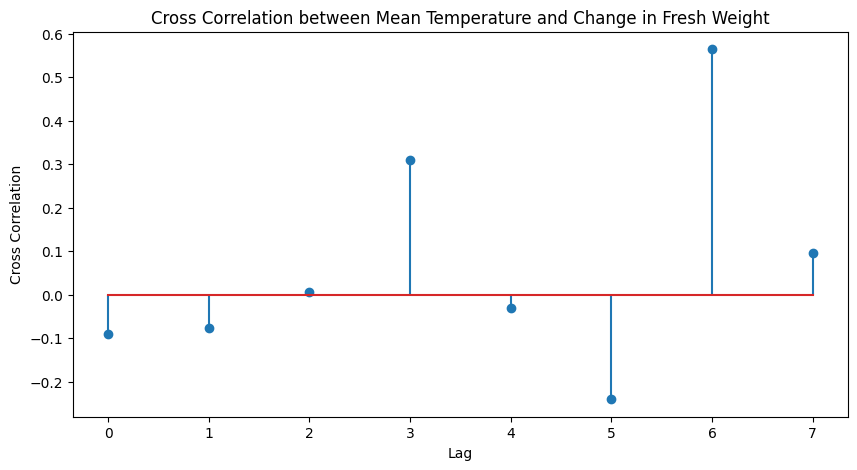

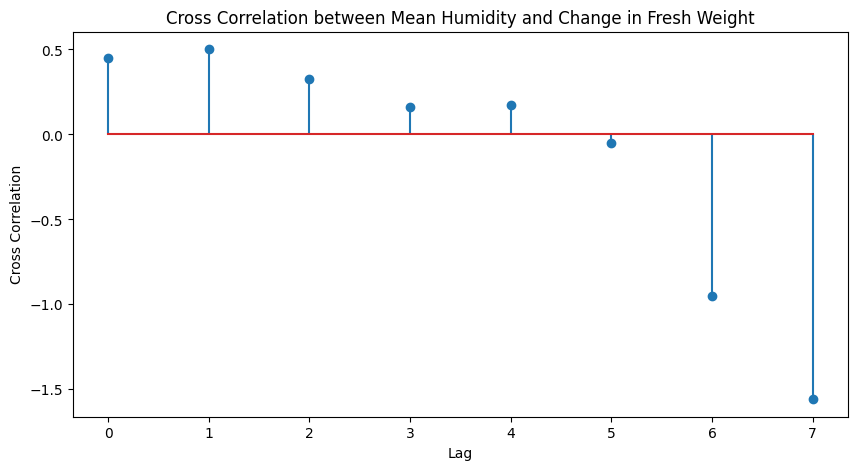

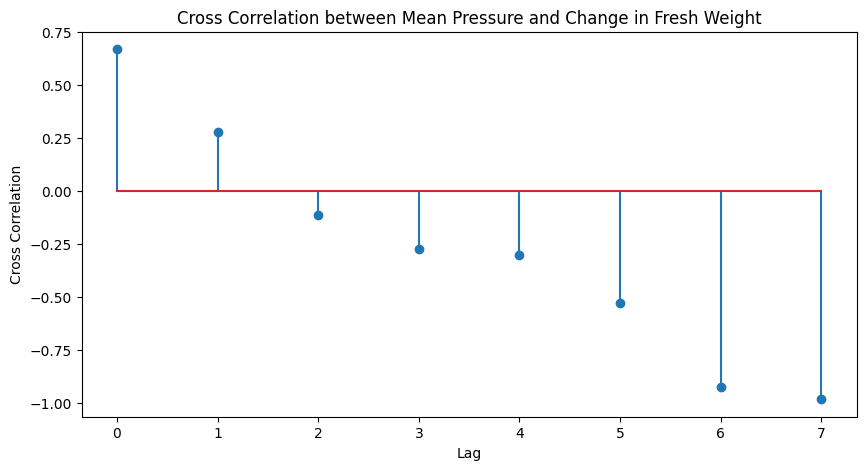

In [21]:
from statsmodels.tsa.stattools import ccf

# initalize dataframe with cross correlation results
cross_corr_env_df = pd.DataFrame()

for col in mean_env_df.columns:
    if col != 'Days':
        cross_corr = ccf(mean_env_df[col], lettuce_weights['Change in Fresh Weight'])
        plt.figure(figsize=(10, 5))
        plt.stem(range(len(cross_corr)), cross_corr)
        plt.title(f'Cross Correlation between Mean {col} and Change in Fresh Weight')
        plt.xlabel('Lag')
        plt.ylabel('Cross Correlation')
        plt.show()
        cross_corr_env_df[col] = cross_corr



In [22]:
cross_corr_env_df.round(2)

Day  Carbon Dioxide  Temperature  Humidity  Pressure
0  0.91            0.46        -0.09      0.45      0.67
1  0.49            0.03        -0.08      0.50      0.28
2  0.06           -0.25         0.01      0.33     -0.11
3 -0.37           -0.28         0.31      0.16     -0.28
4 -0.64           -0.31        -0.03      0.18     -0.30
5 -0.84           -0.65        -0.24     -0.05     -0.53
6 -1.05           -0.17         0.56     -0.95     -0.92
7 -1.50           -0.53         0.10     -1.56     -0.98

## Nutrient Data Cross Correlation

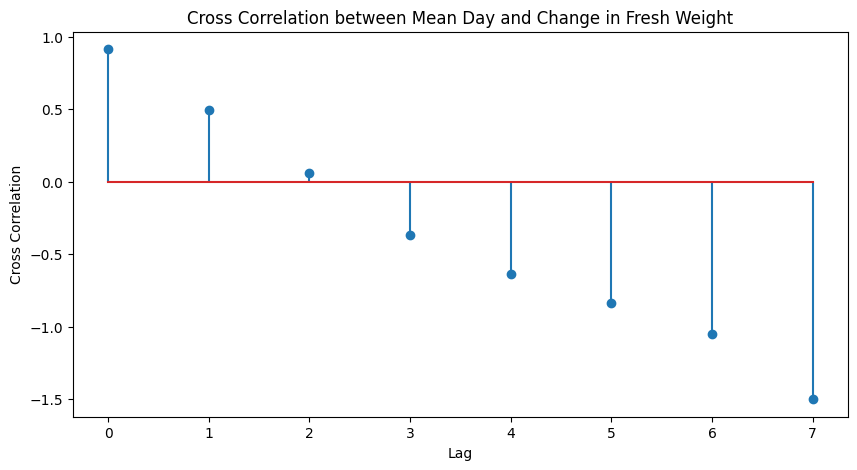

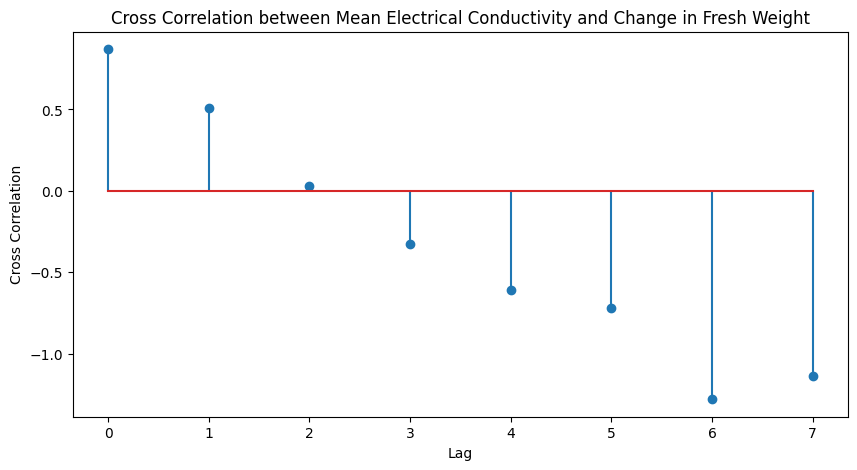

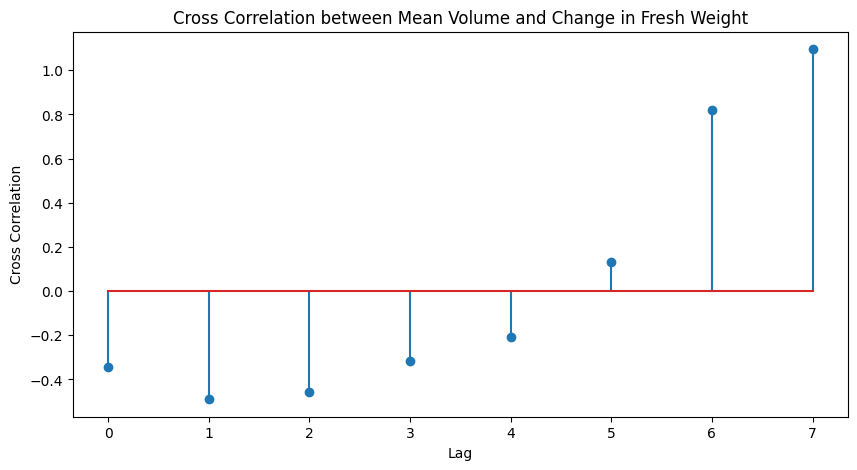

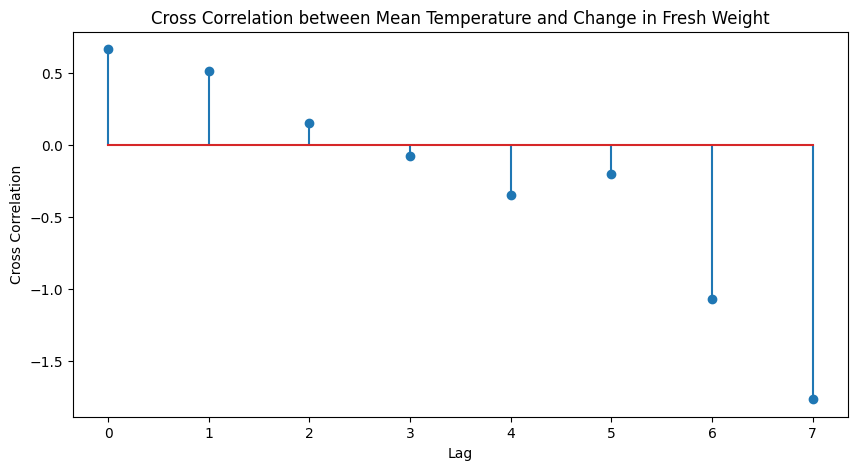

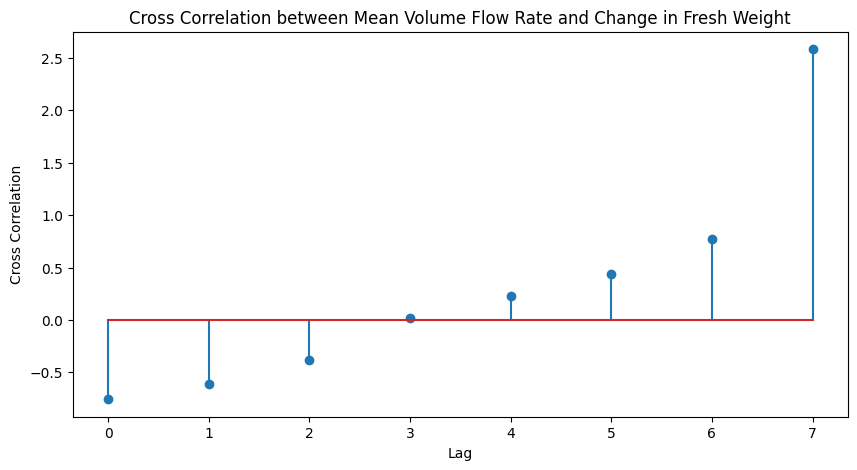

In [23]:
from statsmodels.tsa.stattools import ccf
# intialize dataframe with cross correlation results
cross_corr_nutr_df = pd.DataFrame()

for col in mean_nutr_df.columns:
    if col != 'Days':
        cross_corr = ccf(mean_nutr_df[col], lettuce_weights['Change in Fresh Weight'])
        plt.figure(figsize=(10, 5))
        plt.stem(range(len(cross_corr)), cross_corr)
        plt.title(f'Cross Correlation between Mean {col} and Change in Fresh Weight')
        plt.xlabel('Lag')
        plt.ylabel('Cross Correlation')
        plt.show() 
        cross_corr_nutr_df[col] = cross_corr

In [24]:
cross_corr_nutr_df.round(2)

Day  Electrical Conductivity  Volume  Temperature  Volume Flow Rate
0  0.91                     0.87   -0.35         0.67             -0.76
1  0.49                     0.51   -0.49         0.52             -0.61
2  0.06                     0.03   -0.46         0.15             -0.38
3 -0.37                    -0.33   -0.32        -0.07              0.01
4 -0.64                    -0.61   -0.21        -0.35              0.23
5 -0.84                    -0.72    0.13        -0.20              0.44
6 -1.05                    -1.28    0.82        -1.07              0.78
7 -1.50                    -1.13    1.10        -1.77              2.58

### Full Results

In [25]:
cross_corr_full_df = pd.concat([cross_corr_env_df, cross_corr_nutr_df], axis=1).round(2)
cross_corr_full_df

Day  Carbon Dioxide  Temperature  Humidity  Pressure   Day  \
0  0.91            0.46        -0.09      0.45      0.67  0.91   
1  0.49            0.03        -0.08      0.50      0.28  0.49   
2  0.06           -0.25         0.01      0.33     -0.11  0.06   
3 -0.37           -0.28         0.31      0.16     -0.28 -0.37   
4 -0.64           -0.31        -0.03      0.18     -0.30 -0.64   
5 -0.84           -0.65        -0.24     -0.05     -0.53 -0.84   
6 -1.05           -0.17         0.56     -0.95     -0.92 -1.05   
7 -1.50           -0.53         0.10     -1.56     -0.98 -1.50   

   Electrical Conductivity  Volume  Temperature  Volume Flow Rate  
0                     0.87   -0.35         0.67             -0.76  
1                     0.51   -0.49         0.52             -0.61  
2                     0.03   -0.46         0.15             -0.38  
3                    -0.33   -0.32        -0.07              0.01  
4                    -0.61   -0.21        -0.35              0.23  
5                    -0.72    0.13        -0.20              0.44  
6                    -1.28    0.82        -1.07              0.78  
7                    -1.13    1.10        -1.77              2.58

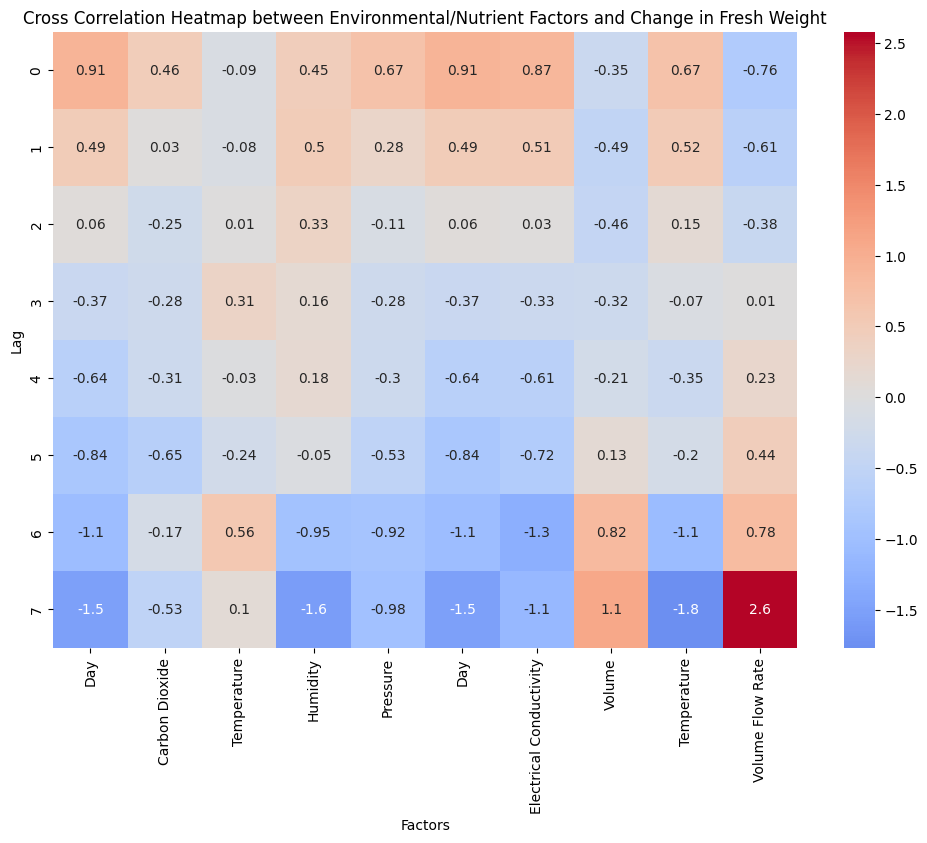

In [26]:
# plot heat map of cross correlation results
plt.figure(figsize=(12, 8))
sns.heatmap(cross_corr_full_df, annot=True, cmap='coolwarm', center=0)
plt.title('Cross Correlation Heatmap between Environmental/Nutrient Factors and Change in Fresh Weight')
plt.xlabel('Factors')
plt.ylabel('Lag')
plt.show()

# Analysis 

## Environmental Data

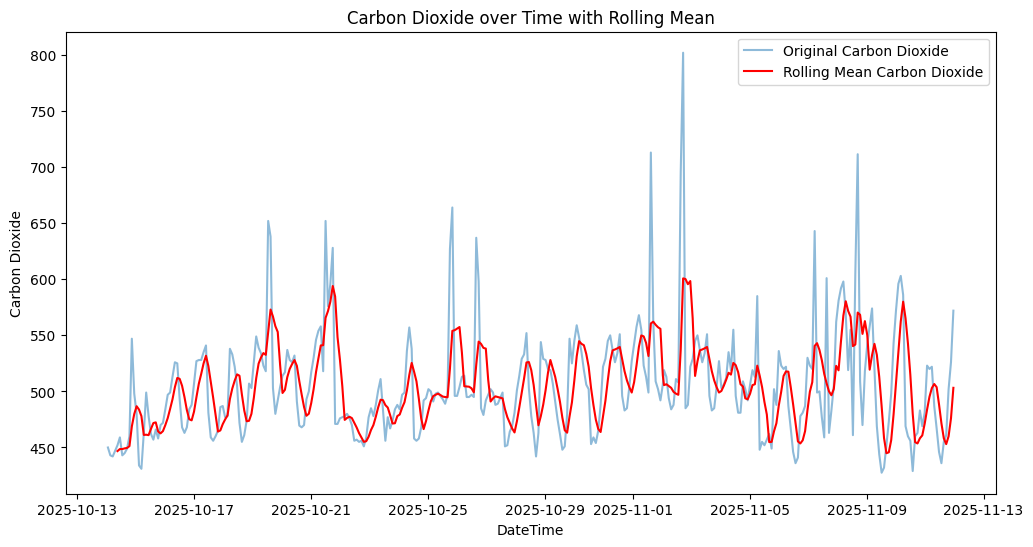

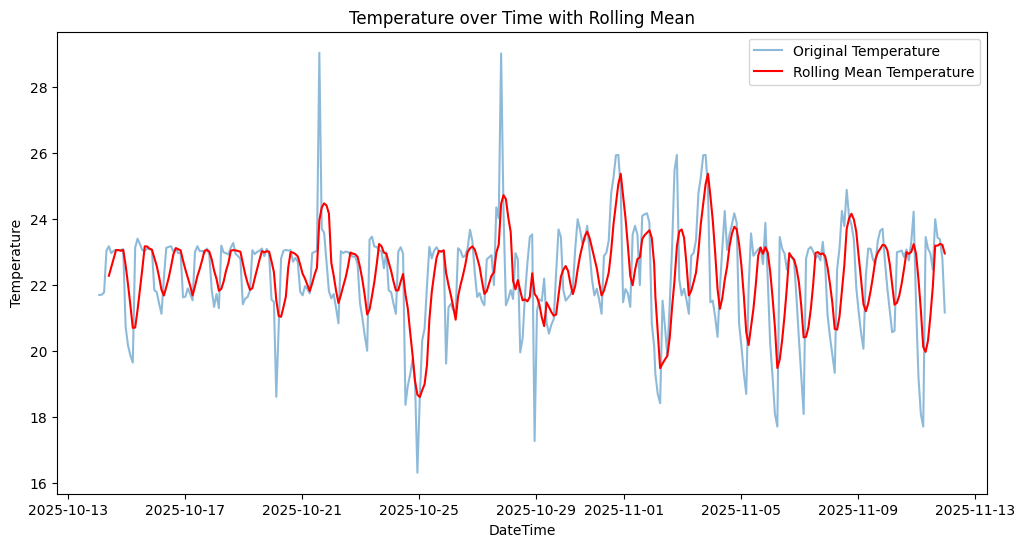

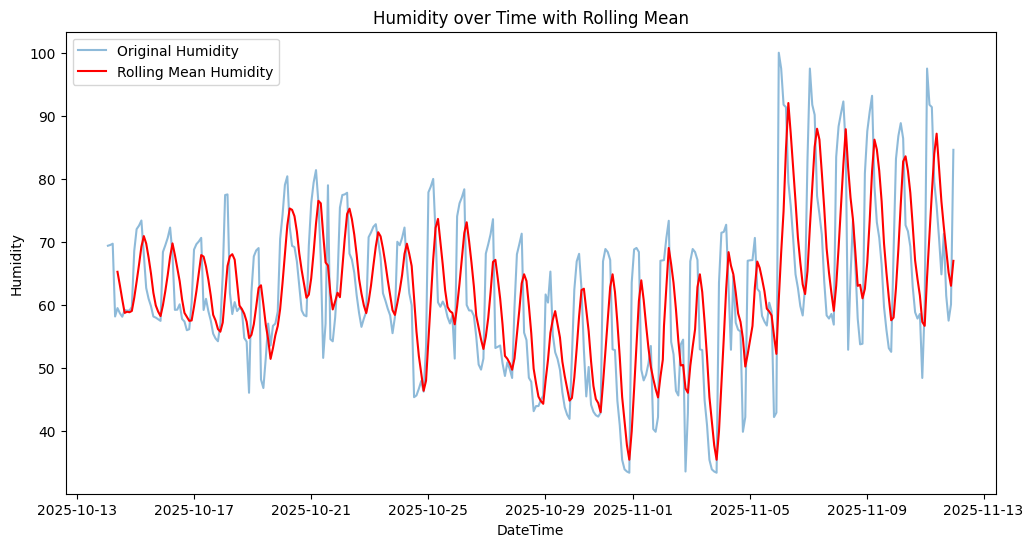

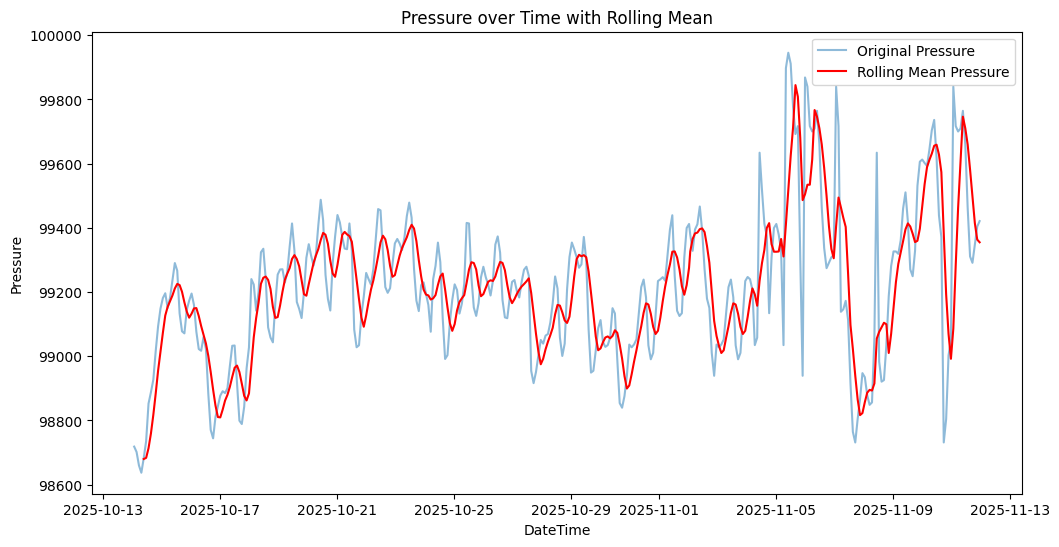

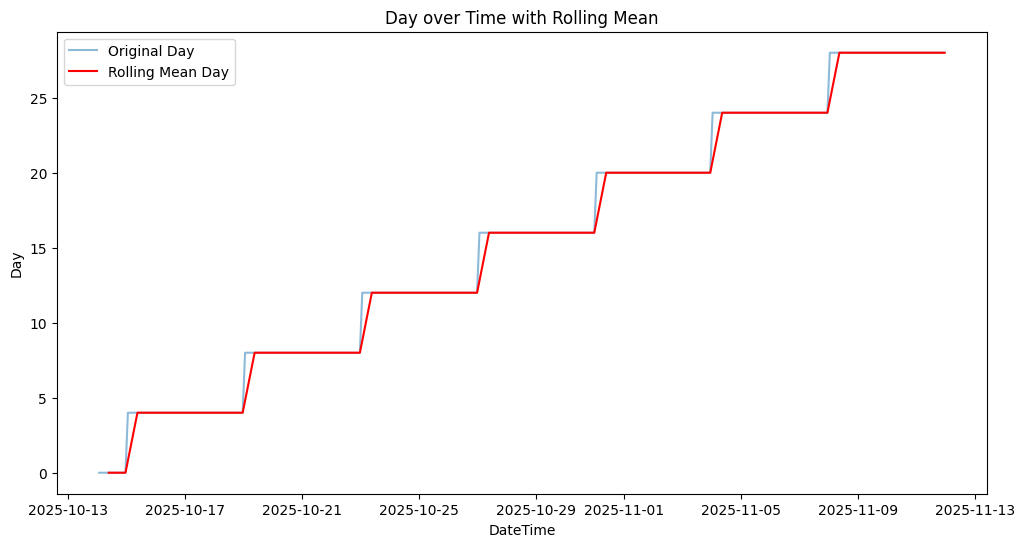

In [27]:
# environmental data rolling means plots
rolling_window = 5
rolling_env_df = env_df.copy()
for col in rolling_env_df.columns:
    if col not in ['DateTime', 'Days']:
        rolling_env_df[f'{col} Rolling Mean'] = env_df[col].rolling(window=rolling_window).mean()
        plt.figure(figsize=(12, 6))
        plt.plot(env_df['DateTime'], rolling_env_df[col], label=f'Original {col}', alpha=0.5)
        plt.plot(env_df['DateTime'], rolling_env_df[f'{col} Rolling Mean'], label=f'Rolling Mean {col}', color='red')
        plt.title(f'{col} over Time with Rolling Mean')
        plt.xlabel('DateTime')
        plt.ylabel(col)
        plt.legend()
        plt.show()

In [28]:
# temperature spikes
env_df[['DateTime', 'Temperature']].sort_values(by='Temperature', ascending=False).head(20)

DateTime  Temperature
92  2025-10-21 13:59:38        29.04
168 2025-10-27 19:09:54        29.02
242 2025-11-02 19:24:38        25.94
217 2025-10-31 19:20:28        25.94
254 2025-11-03 18:57:50        25.94
216 2025-10-31 17:22:42        25.93
253 2025-11-03 17:00:04        25.93
241 2025-11-02 17:26:52        25.47
215 2025-10-31 15:24:56        25.26
252 2025-11-03 15:02:18        25.26
218 2025-10-31 21:18:14        24.93
255 2025-11-03 20:55:36        24.93
313 2025-11-08 14:46:04        24.88
251 2025-11-03 13:04:32        24.77
214 2025-10-31 13:27:10        24.77
166 2025-10-27 15:14:22        24.35
262 2025-11-04 10:39:58        24.24
311 2025-11-08 10:50:32        24.24
169 2025-10-27 21:07:40        24.22
341 2025-11-10 21:43:32        24.22

### Actuator Data

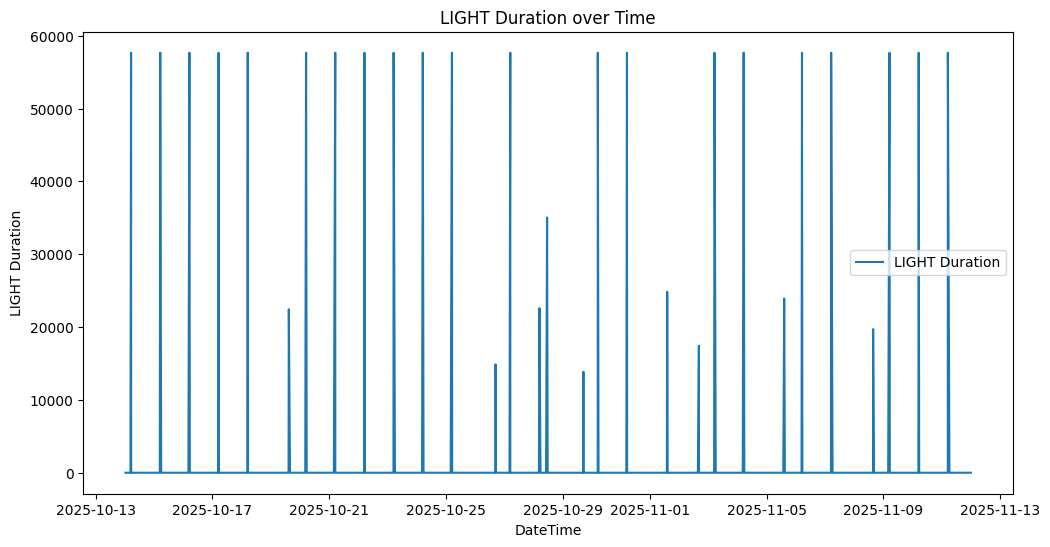

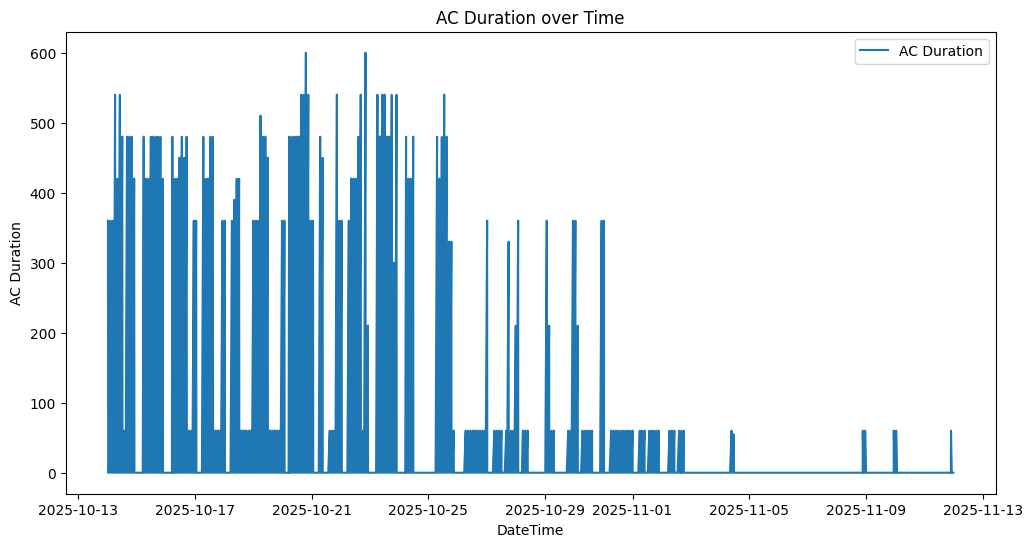

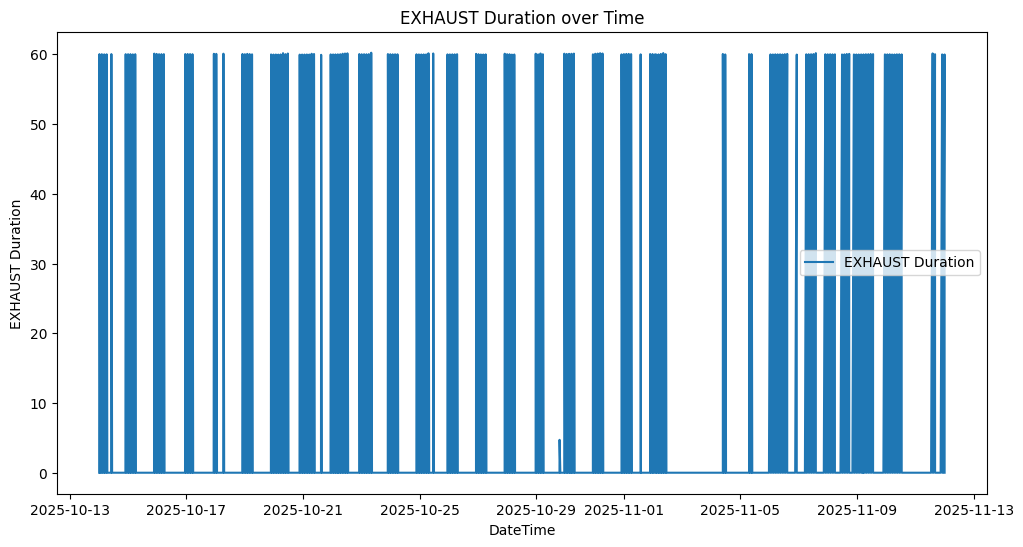

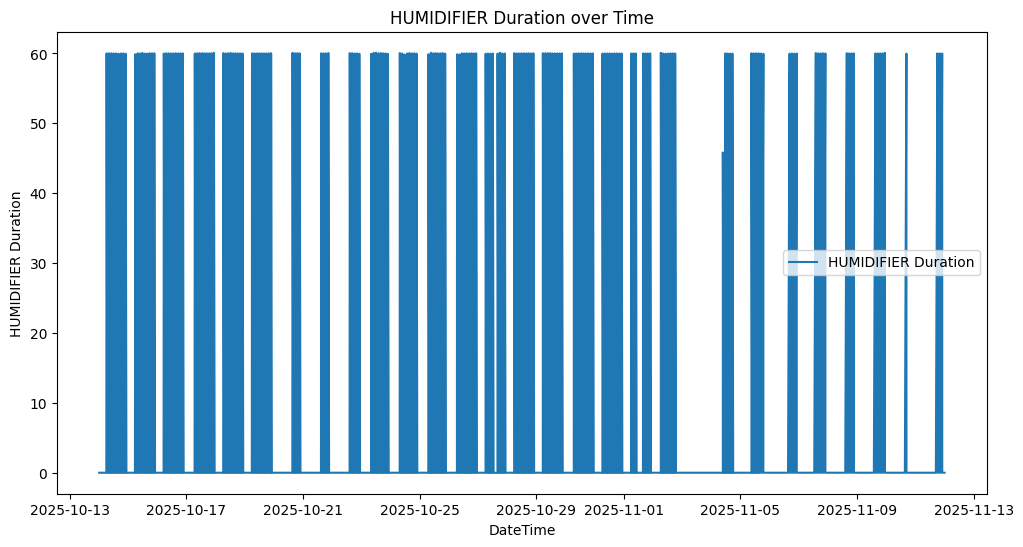

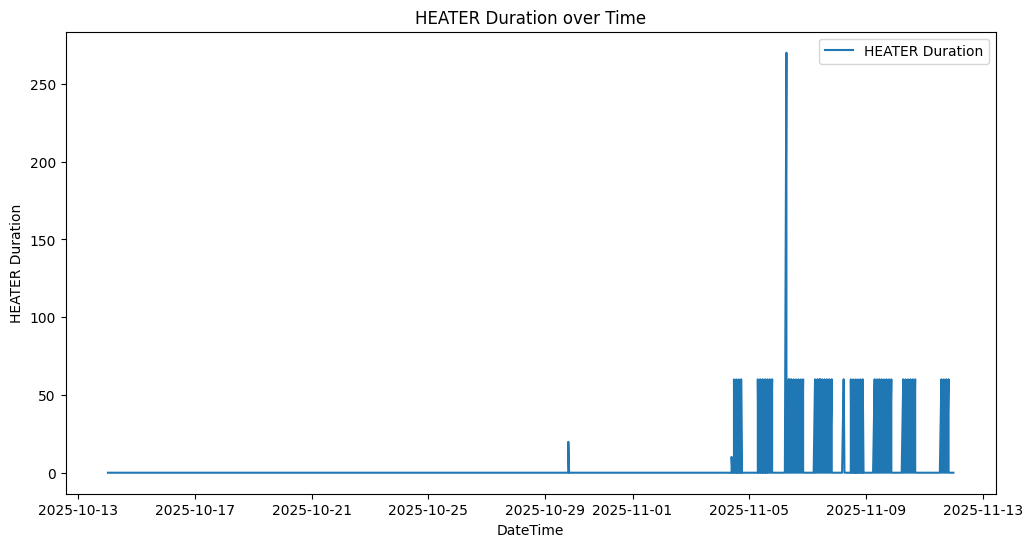

In [29]:
# plot line for each column over time
for col in env_actuator_df.columns:
    if col != 'DateTime':
        plt.figure(figsize=(12, 6))
        plt.plot(env_actuator_df['DateTime'], env_actuator_df[col], label=col)
        plt.title(f'{col} over Time')
        plt.xlabel('DateTime')
        plt.ylabel(col)
        plt.legend()
        plt.show()

## Nutrient Data

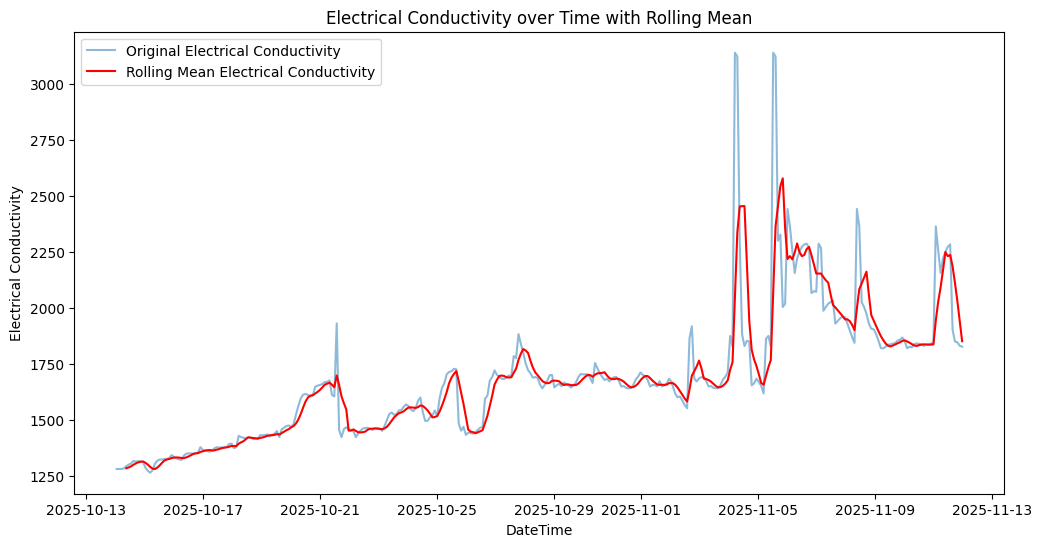

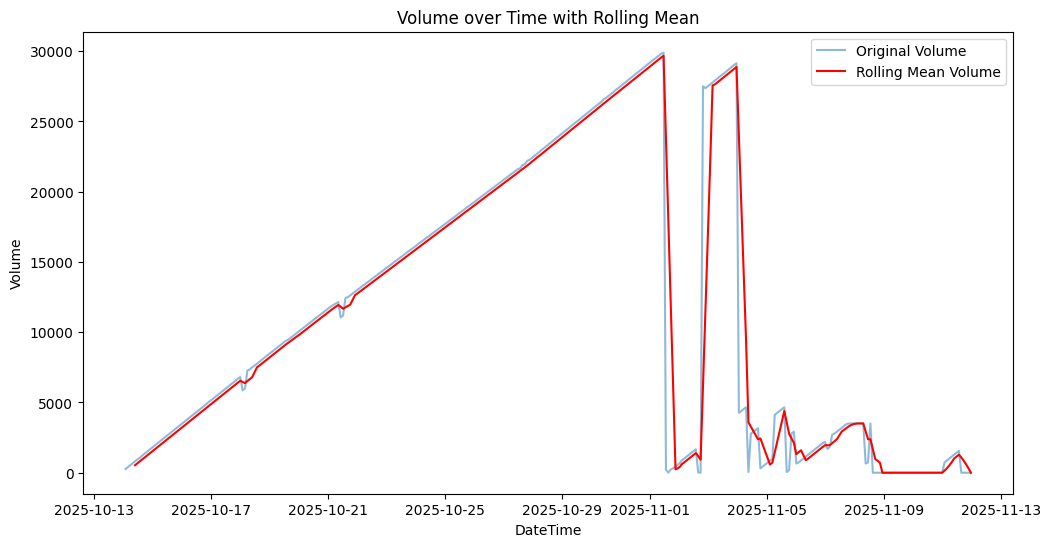

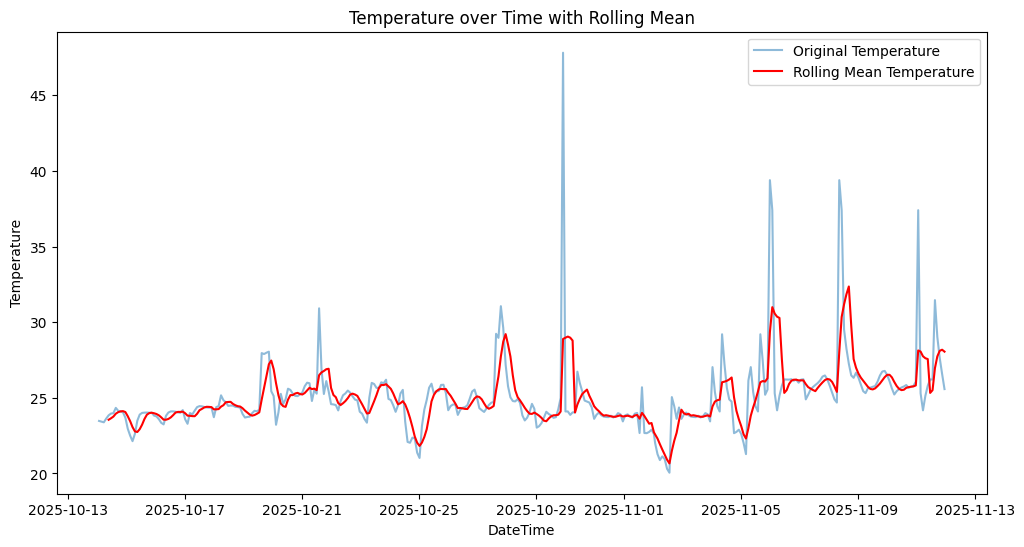

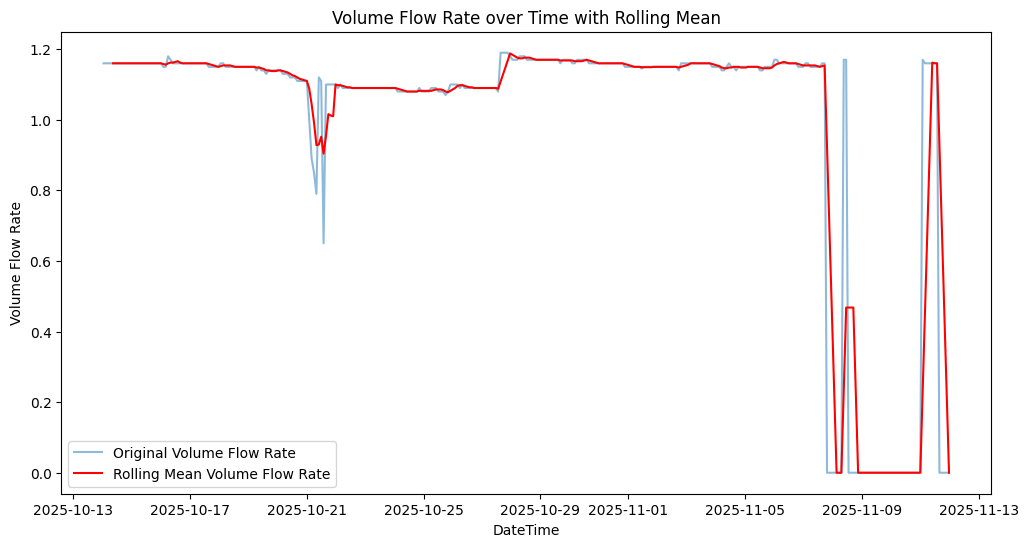

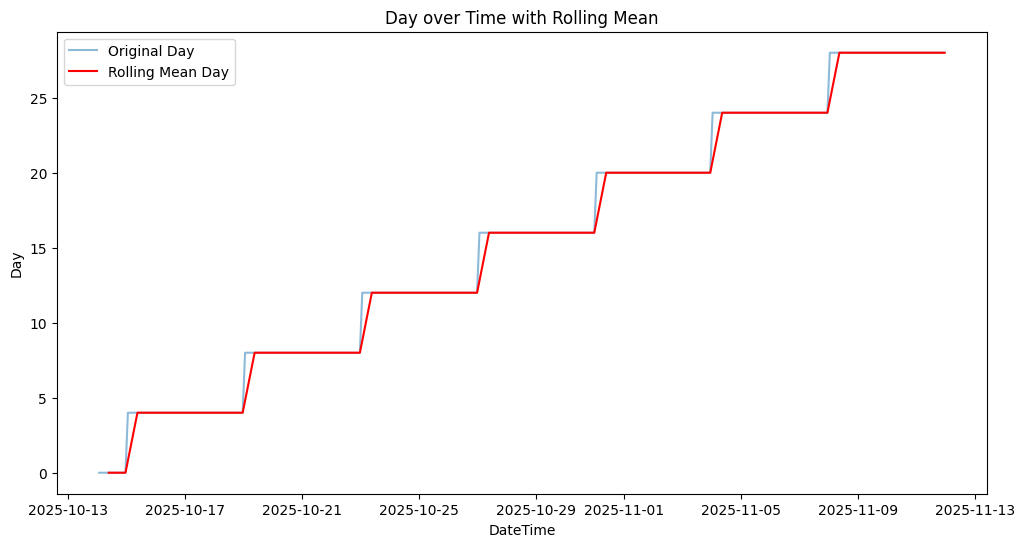

In [30]:
# nutrient data rolling means plots
rolling_window = 5
rolling_nutr_df = nutr_df.copy()
for col in rolling_nutr_df.columns:
    if col not in ['DateTime', 'Days']:
        rolling_nutr_df[f'{col} Rolling Mean'] = nutr_df[col].rolling(window=rolling_window).mean()
        plt.figure(figsize=(12, 6))
        plt.plot(nutr_df['DateTime'], rolling_nutr_df[col], label=f'Original {col}', alpha=0.5)
        plt.plot(nutr_df['DateTime'], rolling_nutr_df[f'{col} Rolling Mean'], label=f'Rolling Mean {col}', color='red')
        plt.title(f'{col} over Time with Rolling Mean')
        plt.xlabel('DateTime')
        plt.ylabel(col)
        plt.legend()
        plt.show()

In [31]:
# temperature spikes
nutr_df[['DateTime', 'Temperature']].sort_values(by='Temperature', ascending=False).head(20)

DateTime  Temperature
194 2025-10-29 22:11:50      47.8180
310 2025-11-08 08:52:46      39.3930
281 2025-11-05 23:57:32      39.3930
343 2025-11-11 01:39:04      37.4070
311 2025-11-08 10:50:32      37.4070
282 2025-11-06 01:55:18      37.4070
350 2025-11-11 15:23:26      31.4610
168 2025-10-27 19:09:54      31.0610
92  2025-10-21 13:59:38      30.9200
169 2025-10-27 21:07:40      29.6150
312 2025-11-08 12:48:18      29.5190
166 2025-10-27 15:14:22      29.2360
277 2025-11-05 16:06:28      29.2040
261 2025-11-04 08:42:12      29.2040
351 2025-11-11 17:21:12      29.0245
167 2025-10-27 17:12:08      28.9660
313 2025-11-08 14:46:04      28.2470
71  2025-10-19 20:46:32      28.0520
70  2025-10-19 18:48:46      27.9870
68  2025-10-19 14:53:14      27.9580

Temperature Spikes on October 29th and other dates.

In [32]:
# electrical conductivity spikes
nutr_df[['DateTime', 'Electrical Conductivity']].sort_values(by='Electrical Conductivity', ascending=False).head(20)

DateTime  Electrical Conductivity
259 2025-11-04 04:46:40                   3141.0
275 2025-11-05 12:10:56                   3141.0
276 2025-11-05 14:08:42                   3124.5
260 2025-11-04 06:44:26                   3124.5
281 2025-11-05 23:57:32                   2443.0
310 2025-11-08 08:52:46                   2443.0
343 2025-11-11 01:39:04                   2365.5
282 2025-11-06 01:55:18                   2365.5
311 2025-11-08 10:50:32                   2365.5
278 2025-11-05 18:04:14                   2329.0
261 2025-11-04 08:42:12                   2301.0
277 2025-11-05 16:06:28                   2301.0
289 2025-11-06 15:39:40                   2288.0
294 2025-11-07 01:28:30                   2288.0
288 2025-11-06 13:41:54                   2285.0
349 2025-11-11 13:25:40                   2285.0
348 2025-11-11 11:27:54                   2274.0
287 2025-11-06 11:44:08                   2274.0
290 2025-11-06 17:37:26                   2269.0
295 2025-11-07 03:26:16                   2269.0

### Actuator Data

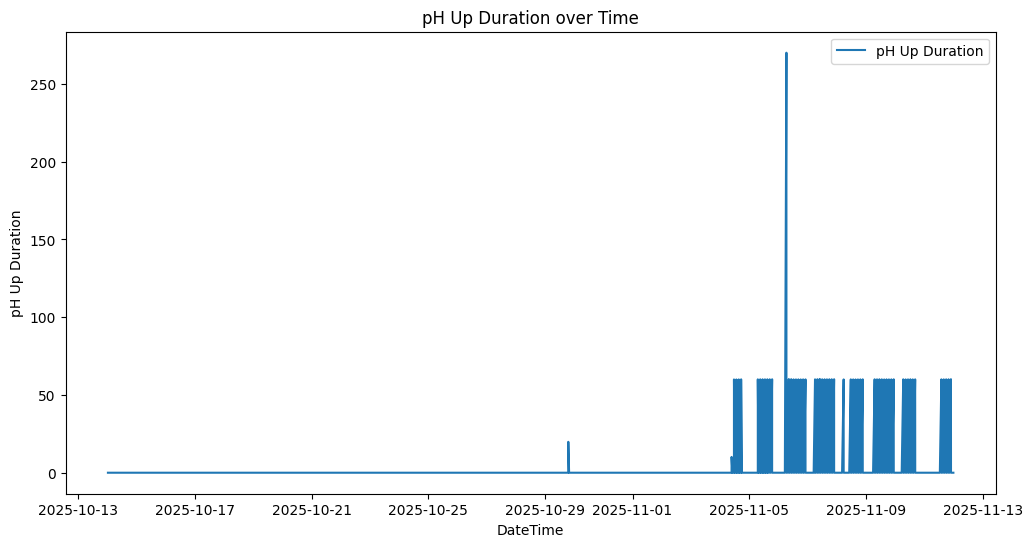

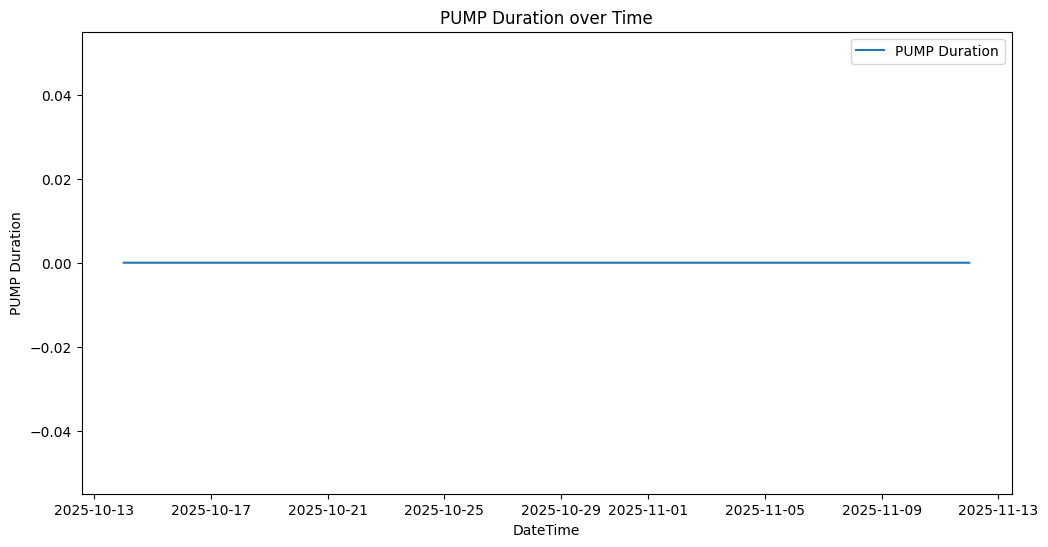

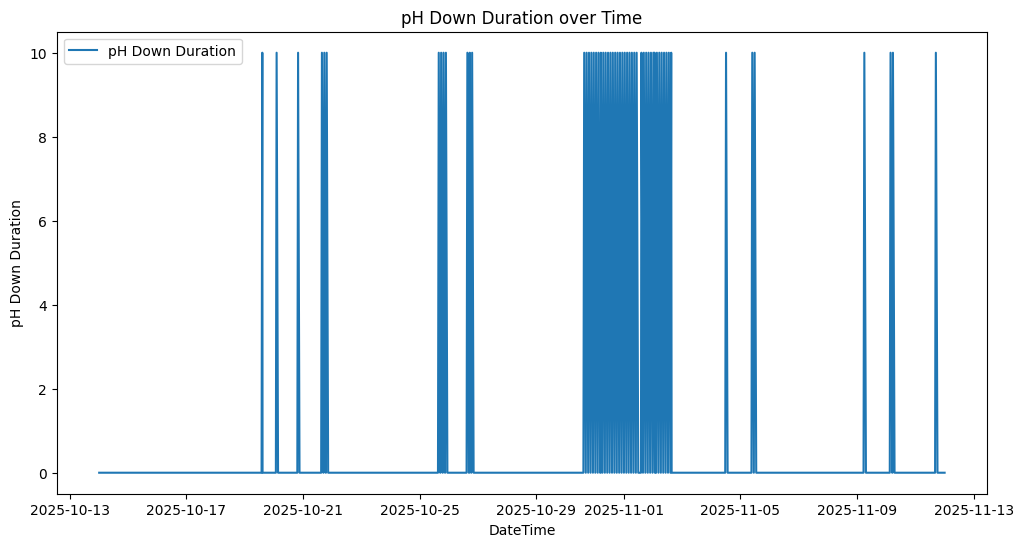

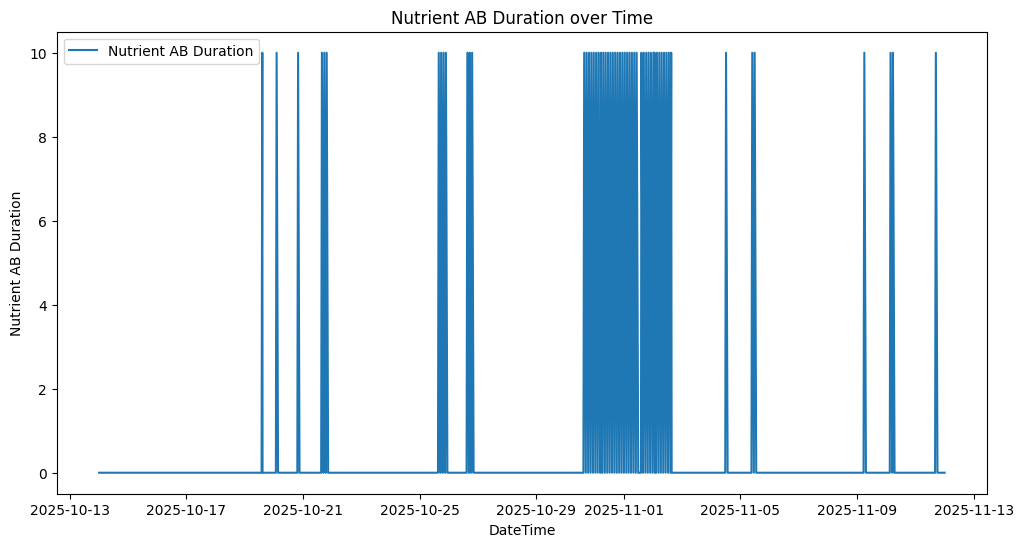

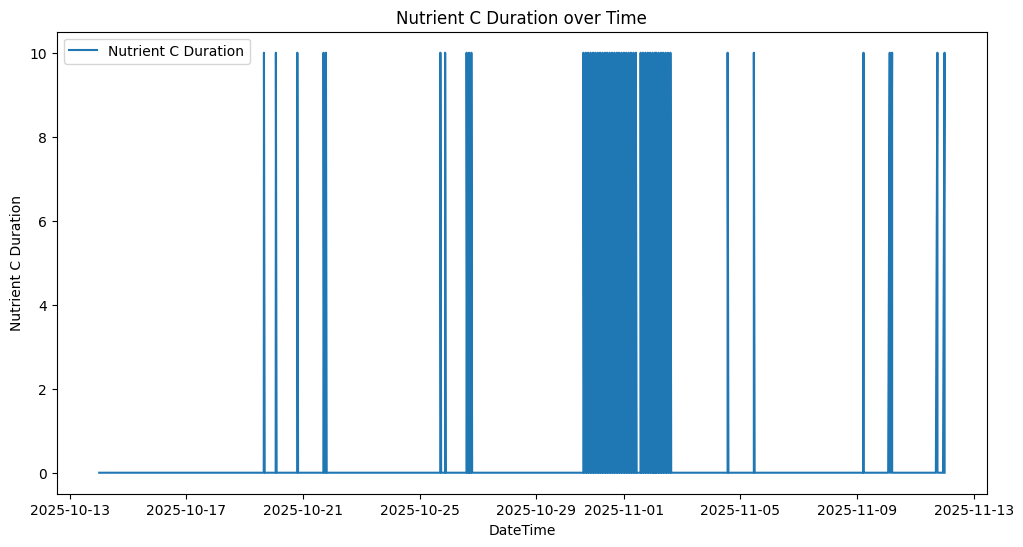

In [33]:
# plot line for each actuator over time
for col in nutr_actuator_df.columns:
    if col != 'DateTime':
        plt.figure(figsize=(12, 6))
        plt.plot(nutr_actuator_df['DateTime'], nutr_actuator_df[col], label=col)
        plt.title(f'{col} over Time')
        plt.xlabel('DateTime')
        plt.ylabel(col)
        plt.legend()
        plt.show()

In [34]:
nutr_actuator_df

DateTime  pH Up Duration  PUMP Duration  pH Down Duration  \
0    2025-10-14 00:21:44            0.00            0.0               0.0   
1    2025-10-14 00:35:37            0.00            0.0               0.0   
2    2025-10-14 01:11:24            0.00            0.0               0.0   
3    2025-10-14 02:19:28            0.00            0.0               0.0   
4    2025-10-14 02:33:18            0.00            0.0               0.0   
...                  ...             ...            ...               ...   
1093 2025-11-11 21:55:31           60.14            0.0               0.0   
1094 2025-11-11 21:59:20            0.00            0.0               0.0   
1095 2025-11-11 22:37:12            0.00            0.0               0.0   
1096 2025-11-11 23:53:12            0.00            0.0               0.0   
1097 2025-11-11 23:57:04            0.00            0.0               0.0   

      Nutrient AB Duration  Nutrient C Duration  
0                      0.0                  0.0  
1                      0.0                  0.0  
2                      0.0                  0.0  
3                      0.0                  0.0  
4                      0.0                  0.0  
...                    ...                  ...  
1093                   0.0                  0.0  
1094                   0.0                  0.0  
1095                   0.0                  0.0  
1096                   0.0                 10.0  
1097                   0.0                  0.0  

[1098 rows x 6 columns]

In [35]:
# actuator ph spikes
nutr_actuator_df[['DateTime', 'pH Up Duration']].sort_values(by='pH Up Duration', ascending=False).head(20)

DateTime  pH Up Duration
881  2025-11-06 06:35:22          270.11
924  2025-11-07 10:02:56           60.30
884  2025-11-06 08:33:03           60.23
1093 2025-11-11 21:55:31           60.14
887  2025-11-06 10:30:44           60.14
921  2025-11-07 08:05:15           60.13
942  2025-11-07 21:49:02           60.11
1001 2025-11-09 11:05:01           60.09
939  2025-11-07 19:51:21           60.09
1041 2025-11-10 12:34:54           60.09
1090 2025-11-11 19:57:50           60.08
936  2025-11-07 17:53:40           60.08
862  2025-11-05 18:49:16           60.08
995  2025-11-09 07:09:39           60.07
850  2025-11-05 10:58:32           60.07
857  2025-11-05 14:53:54           60.07
1019 2025-11-09 22:51:07           60.07
1087 2025-11-11 18:00:09           60.06
847  2025-11-05 09:00:51           60.06
927  2025-11-07 12:00:37           60.06

## Lettuce Growth

In [36]:
lettuce_weights

Day  Median Net Fresh Weight  Target Fresh Weight  Change in Fresh Weight
0    0                      4.7                  3.5                     0.0
1    4                     13.1                  8.8                     8.4
2    8                     19.8                 22.2                     6.7
3   12                     27.3                 56.0                     7.5
4   16                     42.3                 98.8                    15.0
5   20                     80.8                141.5                    38.5
6   24                    139.3                184.3                    58.5
7   28                    219.8                227.0                    80.5

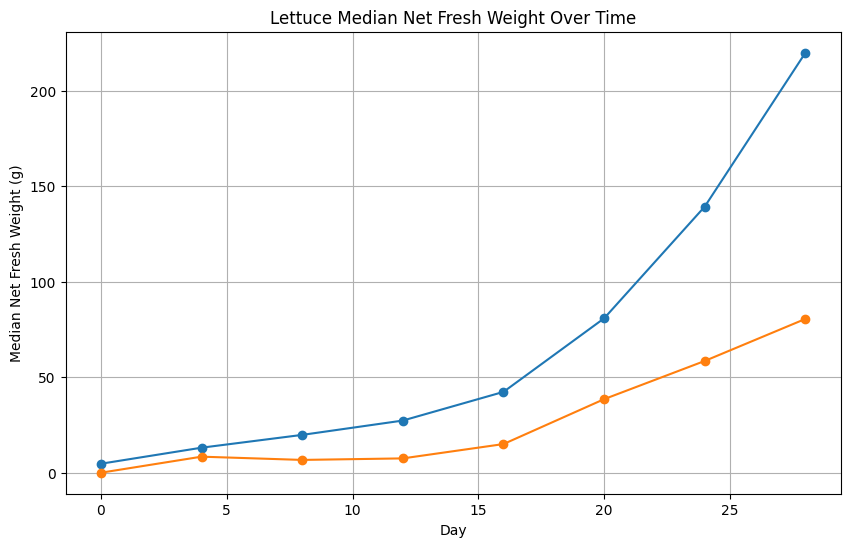

In [37]:
# Plot growth 

plt.figure(figsize=(10, 6))
plt.plot(lettuce_weights['Day'], lettuce_weights['Median Net Fresh Weight'], marker='o')
plt.plot(lettuce_weights['Day'], lettuce_weights['Change in Fresh Weight'], marker='o')
plt.title('Lettuce Median Net Fresh Weight Over Time')
plt.xlabel('Day')
plt.ylabel('Median Net Fresh Weight (g)')
plt.grid(True) 

# Actuator Activity 

### helper functions



In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Helper: build binary ON/OFF state array for an actuator over a datetime grid
def build_state(events_df, col, grid_dt):
    events = events_df[events_df[col] > 0][["DateTime", col]].copy()
    state = np.zeros(len(grid_dt), dtype=int)
    if events.empty:
        return state
    grid_vals = grid_dt.values  # datetime64[ns] numpy array
    starts = events["DateTime"].values
    ends = (events["DateTime"] + pd.to_timedelta(events[col], unit="s")).values
    for s, e in zip(starts, ends):
        i0 = np.searchsorted(grid_vals, s, side="left")
        i1 = np.searchsorted(grid_vals, e, side="left")
        if i0 < i1:
            state[i0:i1] = 1
    return state


In [15]:
# keep 
# Requirements:
# 1) merged df must contain:
#    - datetime_col (actuator/event timeline): e.g. "DateTime"
#    - factor_time_col (TRUE sensor measurement timestamp): e.g. "EnvTime"
#    - factor_col: e.g. "Temperature"
#    - actuator duration columns: e.g. "AC Duration", ...
#
# If you don't have EnvTime yet, create merged_env_df like this:
#   env_sens = env_df.rename(columns={"DateTime":"EnvTime"})
#   merged_env_df = pd.merge_asof(env_actuator_df.sort_values("DateTime"),
#                                 env_sens.sort_values("EnvTime"),
#                                 left_on="DateTime", right_on="EnvTime",
#                                 direction="backward")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

def plot_factor_with_actuators(
    df,
    factor_col,
    actuator_cols,
    datetime_col="DateTime",
    title=None,
    start=None,
    end=None,
    figsize=(14, 6),
    factor_linewidth=1.8,
    factor_alpha=0.95,
    marker="*",
    markersize=6,
    marker_color="black",
    factor_time_col=None,     # <-- pass "EnvTime" here to get TRUE factor timestamps
):
    """
    Single-dataframe plot with correct factor timing.

    - Actuator timing uses df[datetime_col] (event/log timeline).
    - Factor timing uses df[factor_time_col] if provided (TRUE sensor measurement timestamps).
      If factor_time_col is None, it falls back to datetime_col.

    This fixes the "factor changes late" problem when merged df has factor values copied onto actuator timestamps.
    """

    # --- Checks ---
    if datetime_col not in df.columns:
        raise ValueError(f"'{datetime_col}' not found in df.")
    if factor_col not in df.columns:
        raise ValueError(f"'{factor_col}' not found in df.")
    missing = [c for c in actuator_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing actuator columns in df: {missing}")

    ftc = factor_time_col or datetime_col
    if ftc not in df.columns:
        raise ValueError(
            f"factor_time_col='{ftc}' not found in df. "
            f"Pass factor_time_col=None to use '{datetime_col}', or ensure '{ftc}' exists (e.g. 'EnvTime')."
        )

    # --- Prepare dataframe ---
    d = df.copy()
    d[datetime_col] = pd.to_datetime(d[datetime_col], errors="coerce")
    d[ftc] = pd.to_datetime(d[ftc], errors="coerce")
    d = d.dropna(subset=[datetime_col]).sort_values(datetime_col).reset_index(drop=True)

    # window bounds (defined on actuator/event time axis)
    t_start = pd.to_datetime(start) if start is not None else d[datetime_col].min()
    t_end   = pd.to_datetime(end)   if end is not None else d[datetime_col].max()

    # filter for actuator plotting (event axis)
    d_win = d[(d[datetime_col] >= t_start) & (d[datetime_col] <= t_end)].copy()
    if d_win.empty:
        raise ValueError("No data after filtering to the requested time window.")

    # --- Build factor step series using TRUE measurement times (ftc) ---
    env_all = d[[ftc, factor_col]].dropna(subset=[ftc, factor_col]).sort_values(ftc)
    if env_all.empty:
        raise ValueError(f"No non-null values found for factor_col='{factor_col}' using time col '{ftc}'.")

    # anchor at window start: last known measurement at/before t_start
    pre_row = env_all[env_all[ftc] <= t_start].tail(1)
    env_in_window = env_all[(env_all[ftc] >= t_start) & (env_all[ftc] <= t_end)].copy()

    plot_env_parts = []
    if not pre_row.empty:
        plot_env_parts.append(pd.DataFrame({ftc: [t_start], factor_col: [pre_row.iloc[0][factor_col]]}))
    if not env_in_window.empty:
        plot_env_parts.append(env_in_window)

    if not plot_env_parts:
        raise ValueError("No factor measurements in/around the window to anchor the step plot.")

    plot_env = pd.concat(plot_env_parts, ignore_index=True).sort_values(ftc)

    # extend to window end so the last value holds through t_end
    plot_env = pd.concat(
        [plot_env, pd.DataFrame({ftc: [t_end], factor_col: [plot_env.iloc[-1][factor_col]]})],
        ignore_index=True
    ).sort_values(ftc)

    # --- Plot setup ---
    fig, ax = plt.subplots(figsize=figsize)

    # Factor (blue): plotted on TRUE timestamps (ftc)
    ax.step(
        plot_env[ftc],
        plot_env[factor_col],
        where="post",
        color="tab:blue",
        linewidth=factor_linewidth,
        alpha=factor_alpha,
        label=factor_col,
        zorder=3,
    )
    ax.set_ylabel(factor_col)
    ax.set_xlabel(datetime_col)

    # datetime formatting
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    # --- Actuators (exact ON segments) on right axis using datetime_col ---
    ax2 = ax.twinx()
    lane_gap = 1.2
    lane_y = {act: i * lane_gap for i, act in enumerate(actuator_cols)}
    ax2.set_yticks([lane_y[a] + 0.5 for a in actuator_cols])
    ax2.set_yticklabels([a.replace(" Duration", "") for a in actuator_cols])
    ax2.set_ylim(-0.2, lane_gap * len(actuator_cols) - lane_gap + 1.2)
    ax2.set_ylabel("Actuators ON/OFF (lanes)")

    palette5 = ["tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"]
    colors = {c: palette5[i % len(palette5)] for i, c in enumerate(actuator_cols)}

    for act in actuator_cols:
        ev = d_win[[datetime_col, act]].copy()
        ev[act] = pd.to_numeric(ev[act], errors="coerce").fillna(0.0)
        ev = ev[ev[act] > 0].sort_values(datetime_col)

        lane = lane_y[act]
        color = colors[act]

        # ON segments: [start, start+duration]
        for _, row in ev.iterrows():
            s = row[datetime_col]
            e = s + pd.to_timedelta(row[act], unit="s")

            if e < t_start or s > t_end:
                continue
            s = max(s, t_start)
            e = min(e, t_end)

            ax2.step(
                [s, e],
                [lane + 1, lane + 1],
                where="post",
                color=color,
                linewidth=1.6,
                alpha=0.9,
                label=act.replace(" Duration", ""),
                zorder=2,
            )

        # markers at ON start times
        if not ev.empty:
            starts_dt = ev[datetime_col]
            ax2.plot(
                starts_dt,
                np.full(len(starts_dt), lane + 1),
                marker=marker,
                linestyle="None",
                color=marker_color,
                markersize=markersize,
                zorder=4,
            )

        # lane divider
        ax2.hlines(
            lane + 0.5,
            t_start,
            t_end,
            colors="lightgray",
            linewidth=0.5,
            alpha=0.6,
        )

    # Title
    if title is None:
        title = f"{factor_col} + Actuator Activations (right axis)"
    ax.set_title(title)

    # Legend: factor + actuator patches (prevents duplicate labels from many step segments)
    patches = [mpatches.Patch(color=colors[c], label=c.replace(" Duration", "")) for c in actuator_cols]
    handles = [ax.lines[0]] + patches
    ax.legend(handles=handles, loc="upper left", fontsize=9)

    fig.tight_layout()
    plt.show()
    return fig, (ax, ax2)


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

# scatter
def plot_factor_with_actuators_scatter(
    df,
    factor_col,
    actuator_cols,
    datetime_col="DateTime",
    title=None,
    start=None,
    end=None,
    figsize=(14, 6),
    factor_linewidth=1.8,     # kept for compatibility (not used for scatter)
    factor_alpha=0.95,
    marker="*",
    markersize=6,
    marker_color="black",
    factor_time_col=None,     # <-- pass "EnvTime" / "NutrTime" for TRUE factor timestamps
):
    """
    Single-dataframe plot with correct factor timing.

    - Actuator timing uses df[datetime_col] (event/log timeline).
    - Factor timing uses df[factor_time_col] if provided (TRUE sensor measurement timestamps).
      If factor_time_col is None, it falls back to datetime_col.

    Factor is plotted as SCATTER (blue points) at true measurement timestamps.
    Actuators are plotted as exact ON segments + optional markers at ON start.
    """

    # --- Checks ---
    if datetime_col not in df.columns:
        raise ValueError(f"'{datetime_col}' not found in df.")
    if factor_col not in df.columns:
        raise ValueError(f"'{factor_col}' not found in df.")
    missing = [c for c in actuator_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing actuator columns in df: {missing}")

    ftc = factor_time_col or datetime_col
    if ftc not in df.columns:
        raise ValueError(
            f"factor_time_col='{ftc}' not found in df. "
            f"Pass factor_time_col=None to use '{datetime_col}', or ensure '{ftc}' exists (e.g. 'EnvTime')."
        )

    # --- Prepare dataframe ---
    d = df.copy()
    d[datetime_col] = pd.to_datetime(d[datetime_col], errors="coerce")
    d[ftc] = pd.to_datetime(d[ftc], errors="coerce")
    d = d.dropna(subset=[datetime_col]).sort_values(datetime_col).reset_index(drop=True)

    # window bounds (defined on actuator/event time axis)
    t_start = pd.to_datetime(start) if start is not None else d[datetime_col].min()
    t_end   = pd.to_datetime(end)   if end is not None else d[datetime_col].max()

    # filter for actuator plotting (event axis)
    d_win = d[(d[datetime_col] >= t_start) & (d[datetime_col] <= t_end)].copy()
    if d_win.empty:
        raise ValueError("No data after filtering to the requested time window.")

    # --- Factor points using TRUE measurement times (ftc) ---
    env_all = d[[ftc, factor_col]].dropna(subset=[ftc, factor_col]).sort_values(ftc)
    if env_all.empty:
        raise ValueError(f"No non-null values found for factor_col='{factor_col}' using time col '{ftc}'.")

    # only plot points in the window
    plot_env = env_all[(env_all[ftc] >= t_start) & (env_all[ftc] <= t_end)].copy()
    if plot_env.empty:
        raise ValueError("No factor measurements inside the requested window.")

    # --- Plot setup ---
    fig, ax = plt.subplots(figsize=figsize)

    # Factor as scatter (blue points) at TRUE timestamps
    factor_handle = ax.scatter(
        plot_env[ftc],
        plot_env[factor_col],
        color="tab:blue",
        alpha=factor_alpha,
        s=22,                 # point size (change this if you want bigger)
        label=factor_col,
        zorder=3,
    )
    ax.set_ylabel(factor_col)
    ax.set_xlabel(datetime_col)

    # datetime formatting
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    # --- Actuators on right axis using datetime_col ---
    ax2 = ax.twinx()
    lane_gap = 1.2
    lane_y = {act: i * lane_gap for i, act in enumerate(actuator_cols)}
    ax2.set_yticks([lane_y[a] + 0.5 for a in actuator_cols])
    ax2.set_yticklabels([a.replace(" Duration", "") for a in actuator_cols])
    ax2.set_ylim(-0.2, lane_gap * len(actuator_cols) - lane_gap + 1.2)
    ax2.set_ylabel("Actuators ON/OFF (lanes)")

    palette5 = ["tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"]
    colors = {c: palette5[i % len(palette5)] for i, c in enumerate(actuator_cols)}

    for act in actuator_cols:
        ev = d_win[[datetime_col, act]].copy()
        ev[act] = pd.to_numeric(ev[act], errors="coerce").fillna(0.0)
        ev = ev[ev[act] > 0].sort_values(datetime_col)

        lane = lane_y[act]
        color = colors[act]

        # ON segments: [start, start+duration]
        for _, row in ev.iterrows():
            s = row[datetime_col]
            e = s + pd.to_timedelta(row[act], unit="s")

            if e < t_start or s > t_end:
                continue
            s = max(s, t_start)
            e = min(e, t_end)

            ax2.step(
                [s, e],
                [lane + 1, lane + 1],
                where="post",
                color=color,
                linewidth=1.6,
                alpha=0.9,
                label=act.replace(" Duration", ""),
                zorder=2,
            )

        # markers at ON start times
        if not ev.empty:
            starts_dt = ev[datetime_col]
            ax2.plot(
                starts_dt,
                np.full(len(starts_dt), lane + 1),
                marker=marker,
                linestyle="None",
                color=marker_color,
                markersize=markersize,
                zorder=4,
            )

        # lane divider
        ax2.hlines(
            lane + 0.5,
            t_start,
            t_end,
            colors="lightgray",
            linewidth=0.5,
            alpha=0.6,
        )

    # Title
    if title is None:
        title = f"{factor_col} + Actuator Activations (right axis)"
    ax.set_title(title)

    # Legend: factor + actuator patches
    patches = [mpatches.Patch(color=colors[c], label=c.replace(" Duration", "")) for c in actuator_cols]
    handles = [factor_handle] + patches
    ax.legend(handles=handles, loc="upper left", fontsize=9)

    fig.tight_layout()
    plt.show()
    return fig, (ax, ax2)


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


def _count_activations_on_grid(events_df: pd.DataFrame, col: str, grid_dt: pd.DatetimeIndex) -> np.ndarray:
    """
    Returns cumulative activation count over grid_dt for a single actuator duration column.
    An "activation" = a row where df[col] > 0 (i.e., an ON event starts at DateTime).
    Duration does NOT matter; each event adds +1 once at its start time.
    """
    events = events_df.loc[events_df[col] > 0, ["DateTime"]].copy()
    cum = np.zeros(len(grid_dt), dtype=int)
    if events.empty:
        return cum

    grid_vals = grid_dt.values  # datetime64[ns]
    starts = events["DateTime"].values

    # map each event start time to its grid index (first grid time >= start)
    idx = np.searchsorted(grid_vals, starts, side="left")
    idx = idx[(idx >= 0) & (idx < len(grid_dt))]

    # add +1 at each activation index, then cumulative sum
    np.add.at(cum, idx, 1)
    return np.cumsum(cum)


def plot_cumulative_activations(
    df: pd.DataFrame,
    factor_col: str,
    act_cols=None,
    start_date=None,
    end_date=None,
    freq: str = "10S",
    figsize=(14, 6),
):
    """
    Overlay plot:
    - Left axis: environmental factor (always blue)
    - Right axis: cumulative activation counts for each actuator (step lines)

    Each activation increments by 1 at its start time (df[act] > 0), regardless of duration.
    """

    # ---- Prepare dataframe ----
    df_plot = df.copy()
    df_plot["DateTime"] = pd.to_datetime(df_plot["DateTime"])
    df_plot = df_plot.sort_values("DateTime").reset_index(drop=True)

    # Optional date window
    if start_date is not None:
        df_plot = df_plot[df_plot["DateTime"] >= pd.to_datetime(start_date)]
    if end_date is not None:
        df_plot = df_plot[df_plot["DateTime"] <= pd.to_datetime(end_date)]

    if df_plot.empty:
        raise ValueError("No data left after applying date filters.")

    # Default actuator columns
    if act_cols is None:
        act_cols = ["AC Duration", "EXHAUST Duration", "HUMIDIFIER Duration", "HEATER Duration"]

    # ---- Build datetime grid ----
    t0 = df_plot["DateTime"].min()
    t1 = df_plot["DateTime"].max()
    grid_dt = pd.date_range(t0, t1, freq=freq)

    # ---- Align environmental data onto grid ----
    env_only = df_plot[["DateTime", factor_col]].sort_values("DateTime")
    grid_env = pd.merge_asof(
        pd.DataFrame({"DateTime": grid_dt}),
        env_only,
        on="DateTime",
        direction="backward",
    )

    # ---- Build cumulative activations for each actuator ----
    cum_counts = {act: _count_activations_on_grid(df_plot, act, grid_dt) for act in act_cols}

    # ---- Colors ----
    factor_color = "tab:blue"
    actuator_palette = ["magenta", "orange", "red", "green", "purple"]
    colors_map = {act: actuator_palette[i % len(actuator_palette)] for i, act in enumerate(act_cols)}

    # ---- Plot ----
    fig, ax1 = plt.subplots(figsize=figsize)

    # Left axis: factor
    ax1.plot(
        grid_dt,
        grid_env[factor_col],
        color=factor_color,
        linewidth=1.8,
        alpha=0.95,
        label=factor_col,
    )
    ax1.set_xlabel("DateTime")
    ax1.set_ylabel(factor_col)
    ax1.set_title(f"{factor_col} (left) + Cumulative Actuator Activations (right)")

    # Right axis: cumulative activation counts
    ax2 = ax1.twinx()
    ax2.set_ylabel("Cumulative activations")

    for act in act_cols:
        ax2.step(
            grid_dt,
            cum_counts[act],
            where="post",
            linewidth=1.6,
            color=colors_map[act],
            label=act.replace(" Duration", ""),
        )

    # Datetime formatting (same style as your previous function)
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(formatter)

    # Combined legend
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc="upper left", fontsize=9)

    plt.tight_layout()
    plt.show()
    return fig, ax1, ax2



In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


def _activation_impulses_on_grid(events_df: pd.DataFrame, col: str, grid_dt: pd.DatetimeIndex) -> np.ndarray:
    """
    Returns a 0/1 impulse series over grid_dt.
    1 indicates an activation start (df[col] > 0) mapped onto the grid.
    Duration does NOT matter.
    """
    events = events_df.loc[events_df[col] > 0, ["DateTime"]].copy()
    impulses = np.zeros(len(grid_dt), dtype=int)
    if events.empty:
        return impulses

    grid_vals = grid_dt.values
    starts = events["DateTime"].values

    # map each start to the first grid time >= start
    idx = np.searchsorted(grid_vals, starts, side="left")
    idx = idx[(idx >= 0) & (idx < len(grid_dt))]

    # if multiple activations land in same grid bin, this will count them (2,3,...) not just 1
    np.add.at(impulses, idx, 1)
    return impulses


def plot_rolling_activations(
    df: pd.DataFrame,
    factor_col: str,
    act_cols=None,
    start_date=None,
    end_date=None,
    freq: str = "10s",
    rolling_window: int = 5,
    window_mode: str = "points",   # "points" or "time"
    figsize=(14, 6),
):
    """
    Overlay plot:
    - Left axis: environmental factor (blue)
    - Right axis: rolling average of activation *impulses* (NOT cumulative)

    Each activation increments by 1 at its start time (df[act] > 0), regardless of duration.

    Rolling average:
    - window_mode="points": rolling_window is # of grid points
    - window_mode="time":   rolling_window is a pandas offset string like "4H", "1D"
    """

    # ---- Prepare dataframe ----
    df_plot = df.copy()
    df_plot["DateTime"] = pd.to_datetime(df_plot["DateTime"])
    df_plot = df_plot.sort_values("DateTime").reset_index(drop=True)

    # Optional date window
    if start_date is not None:
        df_plot = df_plot[df_plot["DateTime"] >= pd.to_datetime(start_date)]
    if end_date is not None:
        df_plot = df_plot[df_plot["DateTime"] <= pd.to_datetime(end_date)]

    if df_plot.empty:
        raise ValueError("No data left after applying date filters.")

    if act_cols is None:
        act_cols = ["AC Duration", "EXHAUST Duration", "HUMIDIFIER Duration", "HEATER Duration"]

    # ---- Build datetime grid (cover full range) ----
    offset = pd.tseries.frequencies.to_offset(freq)
    t0 = df_plot["DateTime"].min().floor(freq)
    t1 = df_plot["DateTime"].max().ceil(freq) + offset
    grid_dt = pd.date_range(t0, t1, freq=freq)

    # ---- Align environmental data onto grid ----
    env_only = df_plot[["DateTime", factor_col]].sort_values("DateTime")
    grid_env = pd.merge_asof(
        pd.DataFrame({"DateTime": grid_dt}),
        env_only,
        on="DateTime",
        direction="backward",
    )

    # ---- Build activation impulses for each actuator ----
    impulses = {act: _activation_impulses_on_grid(df_plot, act, grid_dt) for act in act_cols}

    # ---- Compute rolling averages of impulses ----
    rolling_avgs = {}
    for act in act_cols:
        s = pd.Series(impulses[act], index=grid_dt)

        if window_mode == "time":
            # rolling_window should be like "4H", "12H", "1D"
            rolling_avgs[act] = s.rolling(rolling_window, min_periods=1).mean().values
        else:
            # rolling_window is number of grid points
            rolling_avgs[act] = s.rolling(window=rolling_window, min_periods=1).mean().values

    # ---- Colors ----
    factor_color = "tab:blue"
    actuator_palette = ["magenta", "orange", "red", "green", "purple"]
    colors_map = {act: actuator_palette[i % len(actuator_palette)] for i, act in enumerate(act_cols)}

    # ---- Plot ----
    fig, ax1 = plt.subplots(figsize=figsize)

    ax1.plot(
        grid_dt,
        grid_env[factor_col],
        color=factor_color,
        linewidth=1.8,
        alpha=0.95,
        label=factor_col,
    )
    ax1.set_xlabel("DateTime")
    ax1.set_ylabel(factor_col)
    ax1.set_title(f"{factor_col} (left) + Rolling Avg Activations (right)")

    ax2 = ax1.twinx()
    ax2.set_ylabel("Rolling avg activations (per grid point)")

    for act in act_cols:
        ax2.step(
            grid_dt,
            rolling_avgs[act],
            where="post",
            linewidth=1.6,
            color=colors_map[act],
            label=act.replace(" Duration", ""),
        )

    # Datetime formatting
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax1.xaxis.set_major_locator(locator)
    ax1.xaxis.set_major_formatter(formatter)

    # Legend
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc="upper left", fontsize=9)

    plt.tight_layout()
    plt.show()
    return fig, ax1, ax2


## environmental data

In [17]:
# Build merged_env_df but preserve TRUE env measurement times
env_act = env_actuator_df.copy()
env_sens = env_df.copy()

env_act["DateTime"] = pd.to_datetime(env_act["DateTime"])
env_sens["DateTime"] = pd.to_datetime(env_sens["DateTime"])

env_act = env_act.sort_values("DateTime").reset_index(drop=True)
env_sens = env_sens.sort_values("DateTime").reset_index(drop=True)

# rename env timestamp so we keep it
env_sens = env_sens.rename(columns={"DateTime": "EnvTime"})

merged_env_df = pd.merge_asof(
    env_act,
    env_sens,
    left_on="DateTime",
    right_on="EnvTime",
    direction="backward"
)

# DO NOT bfill the factor columns (bfill can pull future sensor values backward in time)
# If you need to fill actuator NaNs, do it ONLY for actuator columns:
act_cols = ["LIGHT Duration", "AC Duration", "EXHAUST Duration", "HUMIDIFIER Duration", "HEATER Duration"]
for c in act_cols:
    if c in merged_env_df.columns:
        merged_env_df[c] = pd.to_numeric(merged_env_df[c], errors="coerce").fillna(0.0)


In [ ]:
#ARCHIVE
merged_env_df = pd.merge_asof(env_actuator_df.sort_values('DateTime'),
                              env_df.sort_values('DateTime'),
                              on='DateTime',
                              direction='backward')

merged_env_df.fillna(method='bfill', inplace=True)
merged_env_df

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_57881/1161117461.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_env_df.fillna(method='bfill', inplace=True)


DateTime  LIGHT Duration  AC Duration  EXHAUST Duration  \
0    2025-10-14 00:21:44             0.0      360.000             0.000   
1    2025-10-14 00:35:37             0.0        0.000            60.035   
2    2025-10-14 01:11:24             0.0        0.000             0.000   
3    2025-10-14 02:19:28             0.0      360.000             0.000   
4    2025-10-14 02:33:18             0.0        0.000            60.027   
...                  ...             ...          ...               ...   
1093 2025-11-11 21:55:31             0.0        0.000            59.992   
1094 2025-11-11 21:59:20             0.0       60.039             0.000   
1095 2025-11-11 22:37:12             0.0        0.000             0.000   
1096 2025-11-11 23:53:12             0.0        0.000            59.985   
1097 2025-11-11 23:57:04             0.0        0.000             0.000   

      HUMIDIFIER Duration  HEATER Duration  Carbon Dioxide  Temperature  \
0                   0.000              0.0           450.0        21.69   
1                   0.000              0.0           450.0        21.69   
2                   0.000              0.0           450.0        21.69   
3                   0.000              0.0           450.0        21.69   
4                   0.000              0.0           450.0        21.69   
...                   ...              ...             ...          ...   
1093               59.993              0.0           526.0        22.80   
1094                0.000              0.0           526.0        22.80   
1095                0.000              0.0           526.0        22.80   
1096                0.000              0.0           572.0        21.16   
1097                0.000              0.0           572.0        21.16   

      Humidity  Pressure   Day  
0        69.39  98718.64   0.0  
1        69.39  98718.64   0.0  
2        69.39  98718.64   0.0  
3        69.39  98718.64   0.0  
4        69.39  98718.64   0.0  
...        ...       ...   ...  
1093     60.08  99404.03  28.0  
1094     60.08  99404.03  28.0  
1095     60.08  99404.03  28.0  
1096     84.60  99421.01  28.0  
1097     84.60  99421.01  28.0  

[1098 rows x 11 columns]

In [20]:
merged_env_df.to_csv('../Data/merged_env_df.csv', index=False)

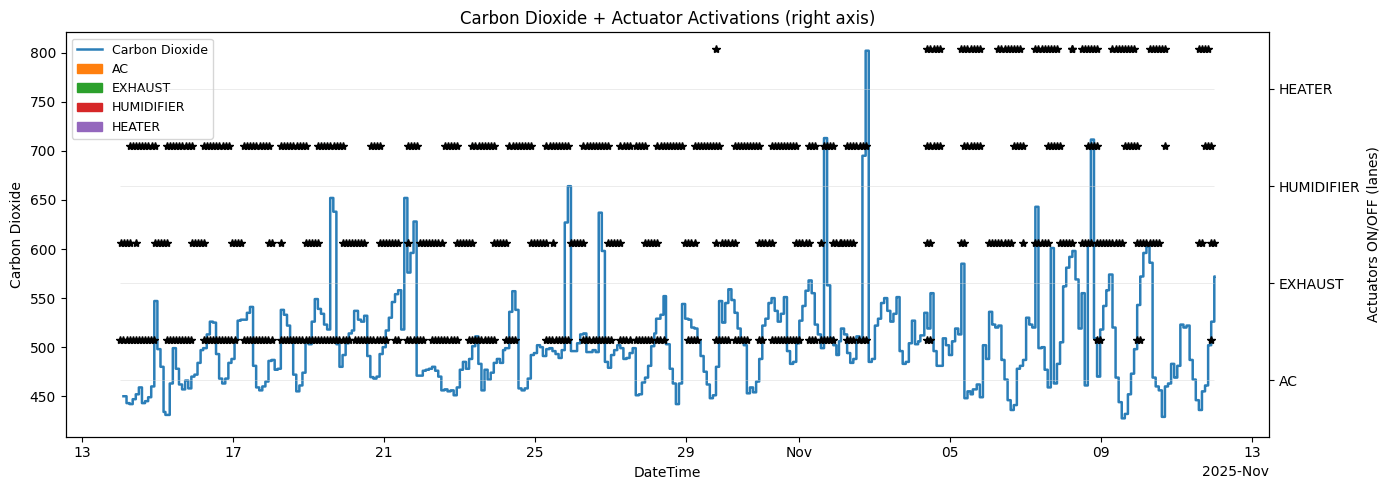

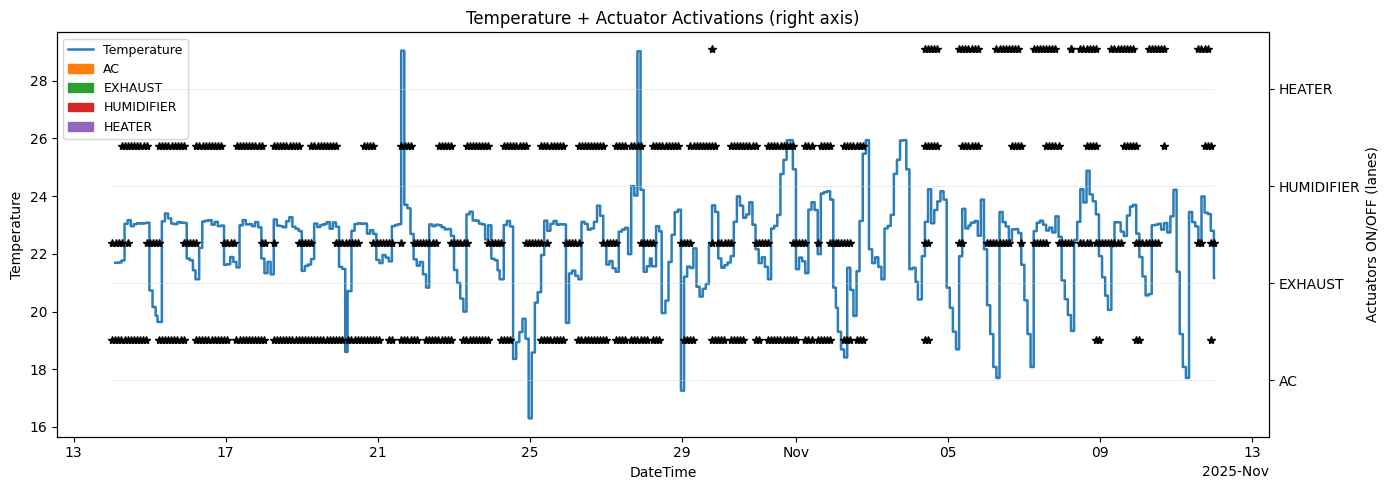

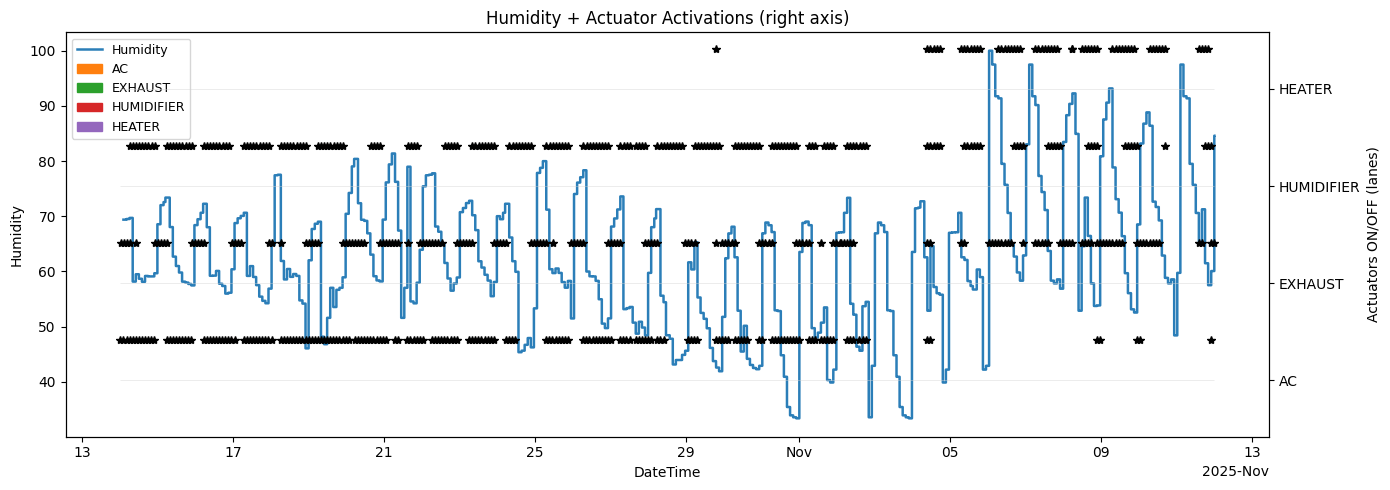

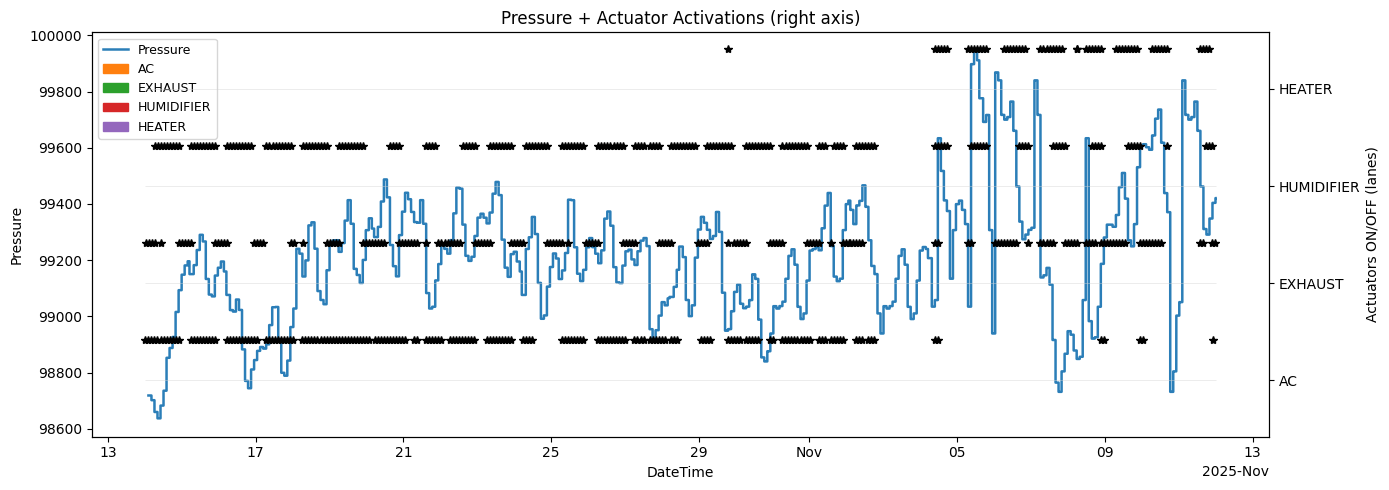

In [18]:

#  Loop over all environmental cols and plot with actuators
env_cols = ["Carbon Dioxide", "Temperature", "Humidity", "Pressure"]
act_cols = ["AC Duration", "EXHAUST Duration", "HUMIDIFIER Duration", "HEATER Duration"]

#
for env in env_cols:
    plot_factor_with_actuators(
        df=merged_env_df,
        factor_col=env,
        actuator_cols=act_cols,
        start=None,
        end=None,        
        figsize=(14,5)
    )




#### cumulative actuator activation

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/4106052166.py:68: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  grid_dt = pd.date_range(t0, t1, freq=freq)


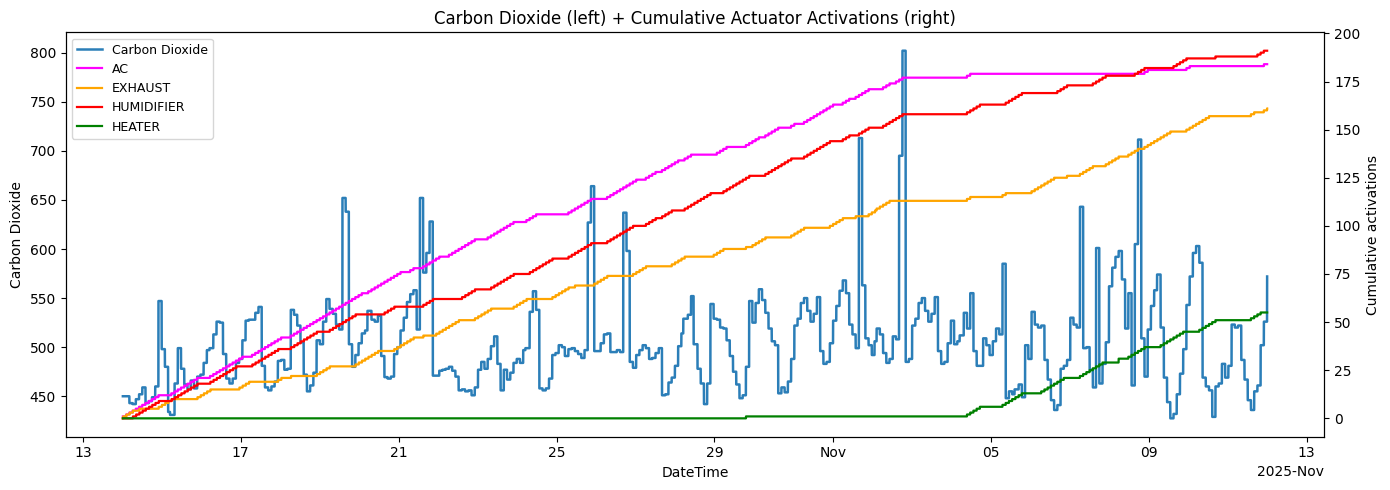

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/4106052166.py:68: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  grid_dt = pd.date_range(t0, t1, freq=freq)


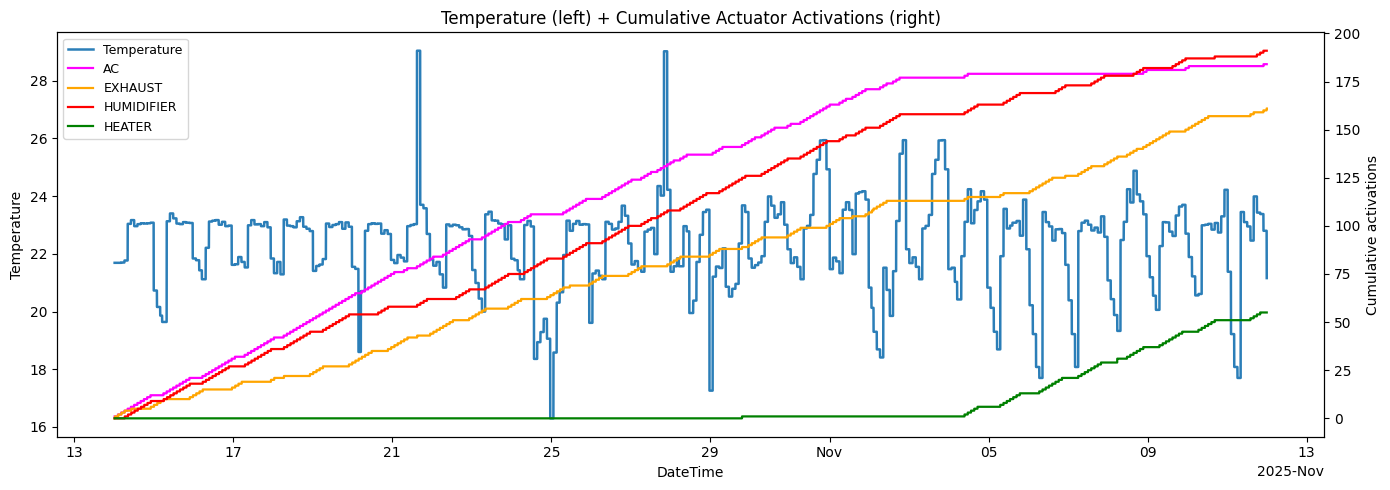

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/4106052166.py:68: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  grid_dt = pd.date_range(t0, t1, freq=freq)


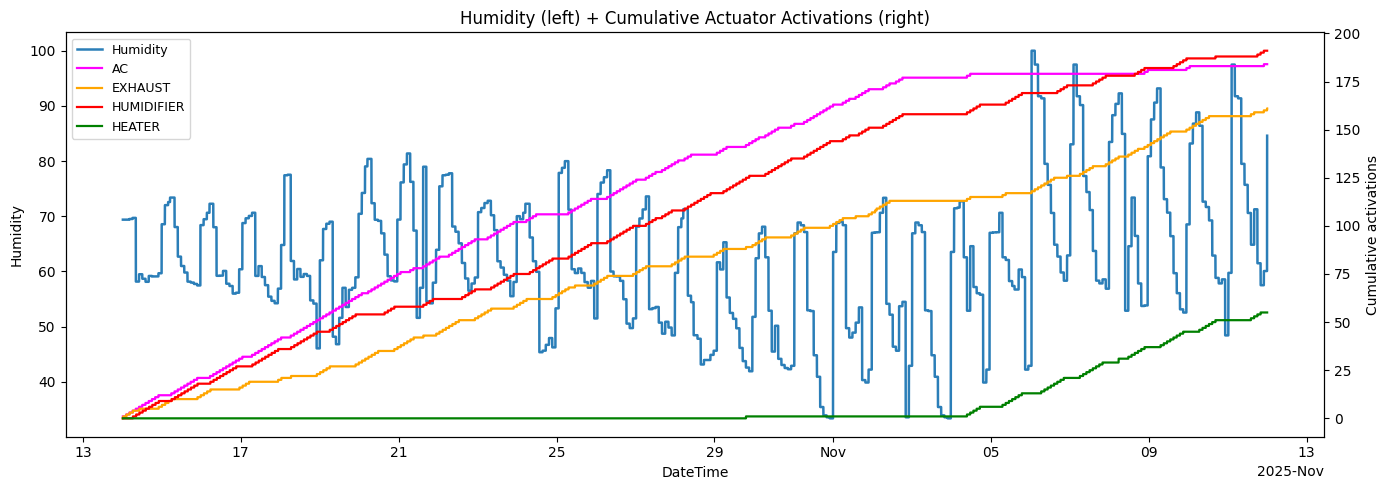

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/4106052166.py:68: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  grid_dt = pd.date_range(t0, t1, freq=freq)


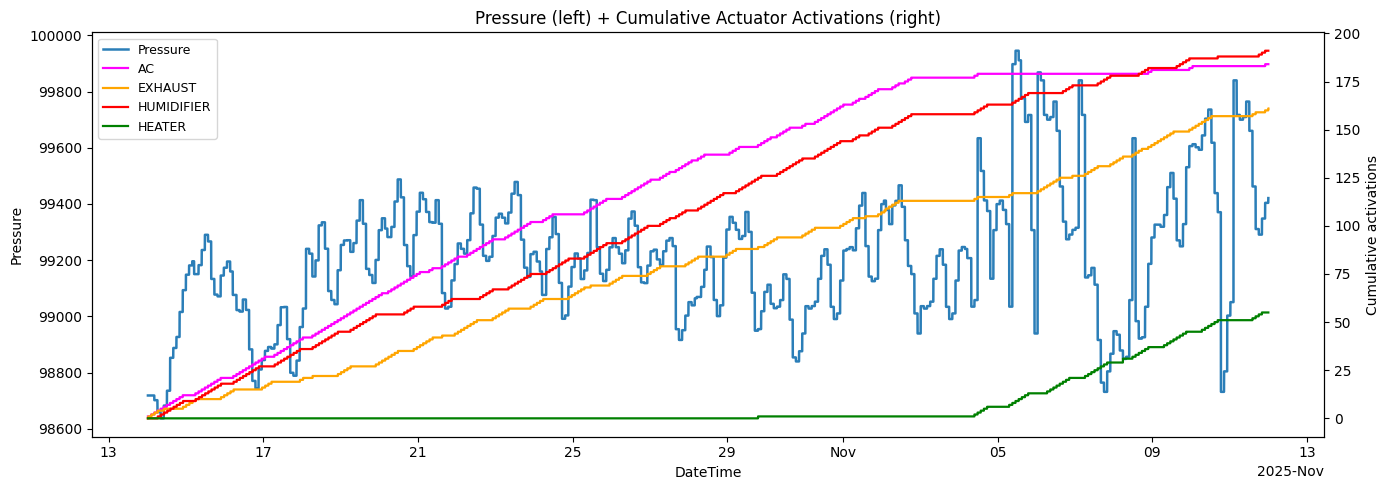

In [ ]:
# plot cumulutative activations for all environmental cols
env_cols = ["Carbon Dioxide", "Temperature", "Humidity", "Pressure"]
act_cols = ["AC Duration", "EXHAUST Duration", "HUMIDIFIER Duration", "HEATER Duration"]
for env in env_cols:
    plot_cumulative_activations(
        df=merged_env_df,
        factor_col=env,
        act_cols=act_cols,
        start_date=None,
        end_date=None,
        freq="1S",         
        figsize=(14,5)
    )

### Zoomed In plots 

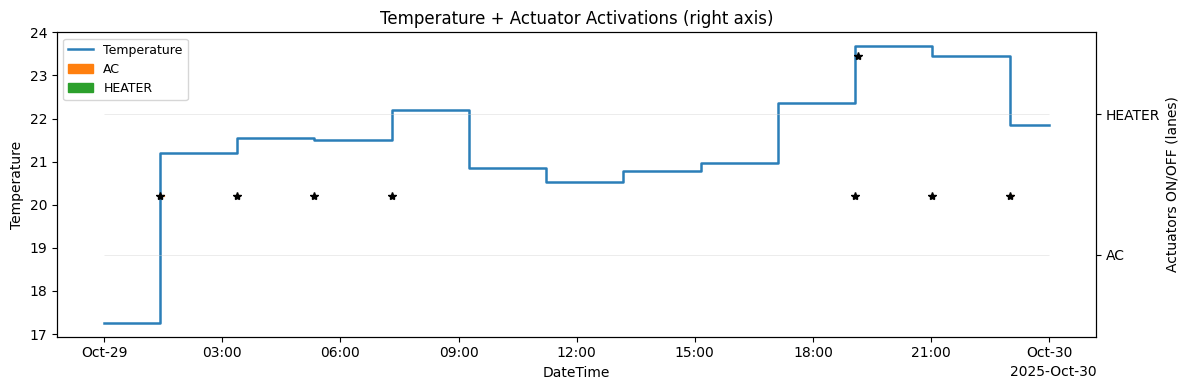

(<Figure size 1200x400 with 2 Axes>,
 (<Axes: title={'center': 'Temperature + Actuator Activations (right axis)'}, xlabel='DateTime', ylabel='Temperature'>,
  <Axes: ylabel='Actuators ON/OFF (lanes)'>))

In [ ]:
# heater in november
plot_factor_with_actuators(
    df=merged_env_df,
    factor_col="Temperature",
    actuator_cols=["AC Duration", "HEATER Duration"],
    start="2025-10-29 00:00:00",
    end="2025-10-30",
    figsize=(12,4)
)

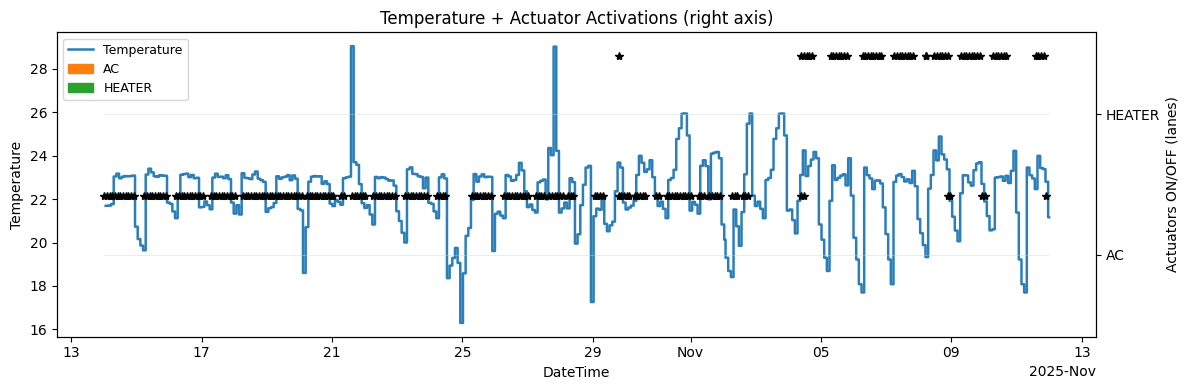

(<Figure size 1200x400 with 2 Axes>,
 (<Axes: title={'center': 'Temperature + Actuator Activations (right axis)'}, xlabel='DateTime', ylabel='Temperature'>,
  <Axes: ylabel='Actuators ON/OFF (lanes)'>))

In [107]:
# keep 
plot_factor_with_actuators(
    merged_env_df,
    factor_col="Temperature",
    actuator_cols=["AC Duration", "HEATER Duration"],
    factor_time_col="EnvTime",   # 
    figsize=(12,4)
)


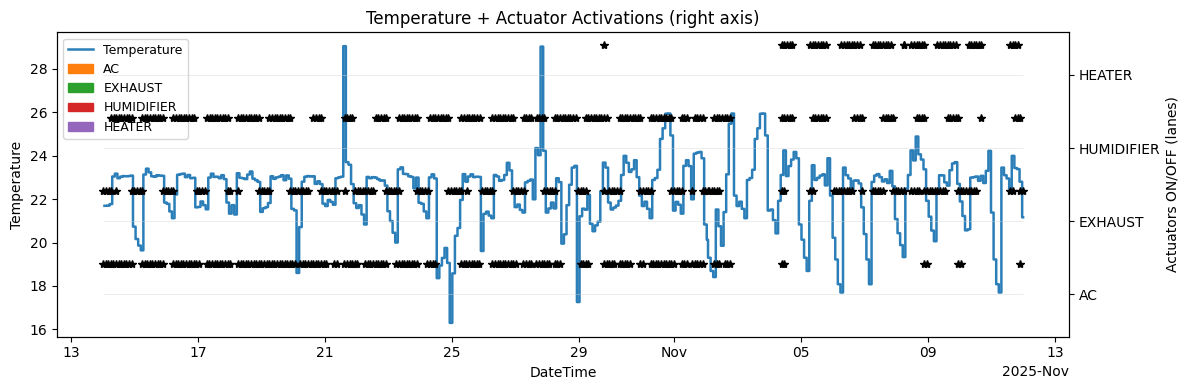

(<Figure size 1200x400 with 2 Axes>,
 (<Axes: title={'center': 'Temperature + Actuator Activations (right axis)'}, xlabel='DateTime', ylabel='Temperature'>,
  <Axes: ylabel='Actuators ON/OFF (lanes)'>))

In [ ]:
# keep 
plot_factor_with_actuators(
    merged_env_df,
    factor_col="Temperature",
    actuator_cols=["AC Duration", "EXHAUST Duration", "HUMIDIFIER Duration", "HEATER Duration"],
    factor_time_col="EnvTime",   # ✅ key line
    figsize=(12,4)
)

### Rolling Activations


/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/3820272417.py:71: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/3820272417.py:72: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  t0 = df_plot["DateTime"].min().floor(freq)
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/3820272417.py:73: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  t1 = df_plot["DateTime"].max().ceil(freq) + offset
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/3820272417.py:74: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grid_dt = pd.date_range(t0, t1, freq=freq)


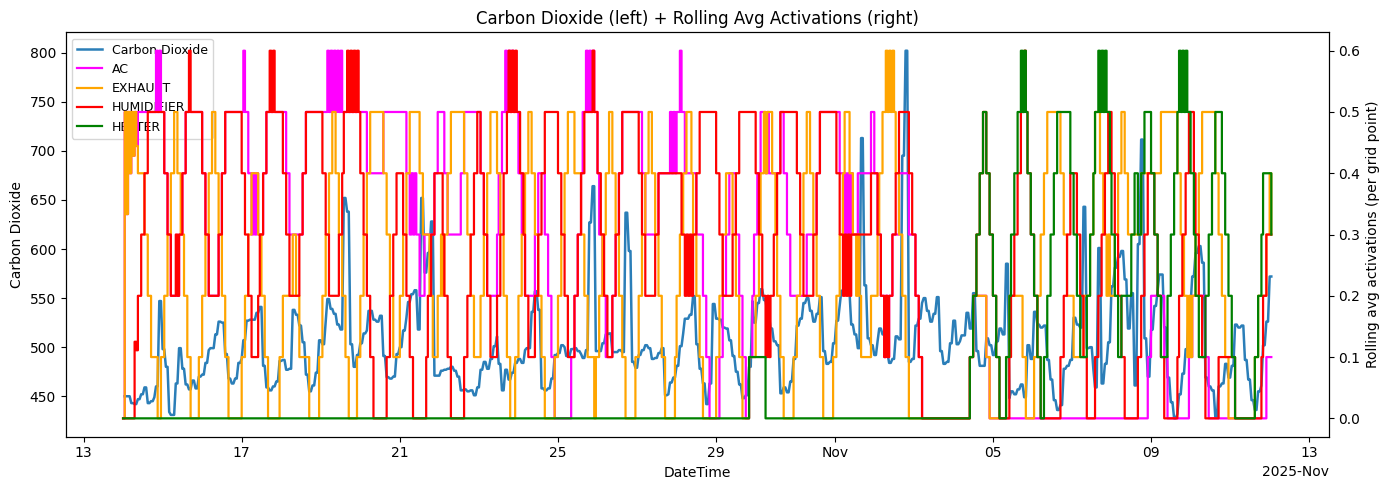

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/3820272417.py:71: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/3820272417.py:72: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  t0 = df_plot["DateTime"].min().floor(freq)
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/3820272417.py:73: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  t1 = df_plot["DateTime"].max().ceil(freq) + offset
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/3820272417.py:74: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grid_dt = pd.date_range(t0, t1, freq=freq)


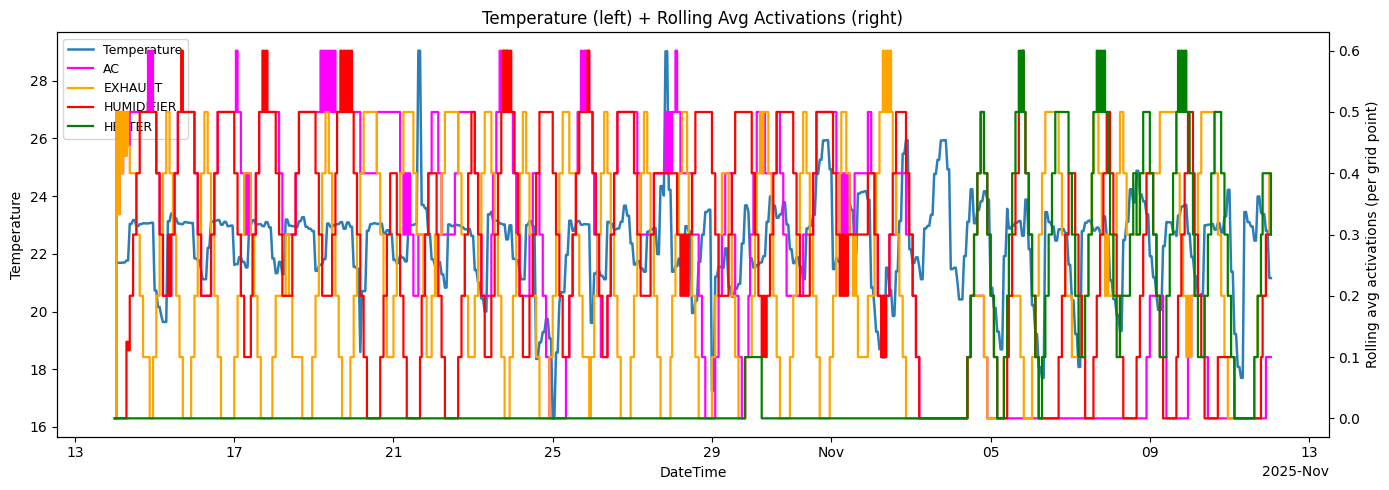

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/3820272417.py:71: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/3820272417.py:72: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  t0 = df_plot["DateTime"].min().floor(freq)
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/3820272417.py:73: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  t1 = df_plot["DateTime"].max().ceil(freq) + offset
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/3820272417.py:74: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grid_dt = pd.date_range(t0, t1, freq=freq)


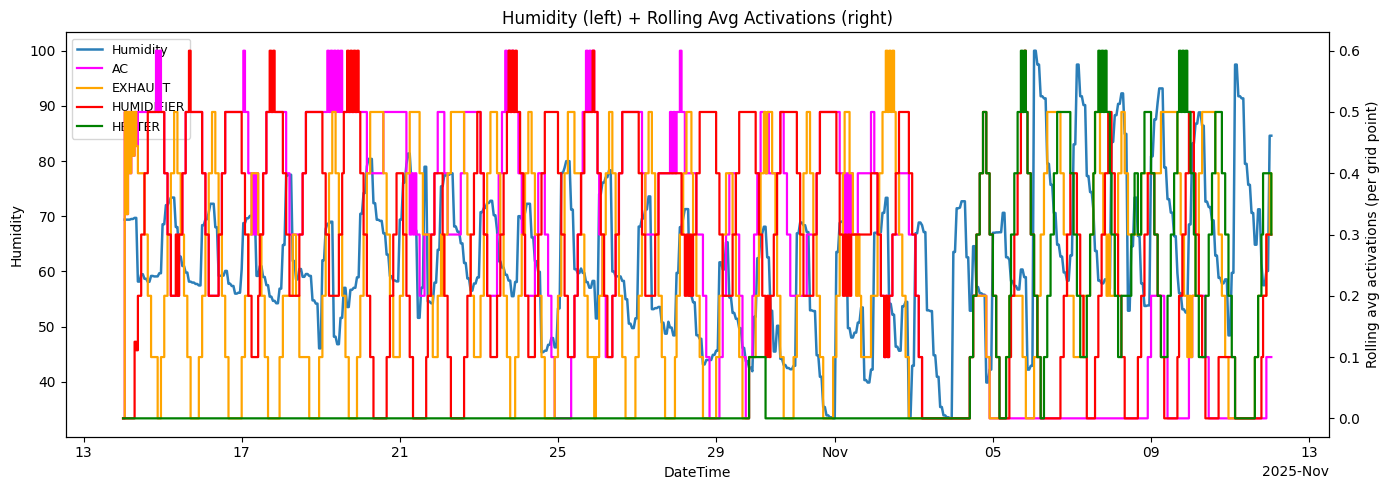

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/3820272417.py:71: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/3820272417.py:72: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  t0 = df_plot["DateTime"].min().floor(freq)
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/3820272417.py:73: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  t1 = df_plot["DateTime"].max().ceil(freq) + offset
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/3820272417.py:74: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  grid_dt = pd.date_range(t0, t1, freq=freq)


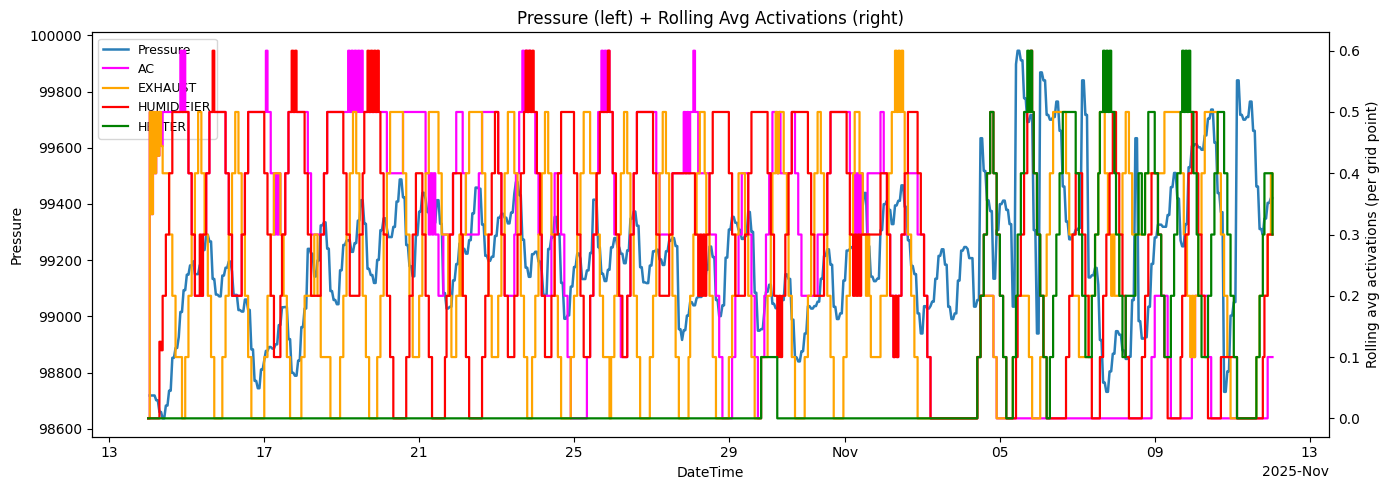

In [ ]:
# rolling per environmental cols
env_cols = ["Carbon Dioxide", "Temperature", "Humidity", "Pressure"]
act_cols = ["AC Duration", "EXHAUST Duration", "HUMIDIFIER Duration", "HEATER Duration"]
for env in env_cols:
    plot_rolling_activations(
        df=merged_env_df,
        factor_col=env,
        act_cols=act_cols,
        start_date=None,
        end_date=None,
        freq="1H",         
        rolling_window=10,   # in grid points
        window_mode="points",
        figsize=(14,5)
    )

## Nutrient data 


build data frame for plots 


In [21]:
# Build merged_nutr_df but preserve TRUE nutrient measurement times (NutrTime)

nutr_act = nutr_actuator_df.copy()
nutr_sens = nutr_df.copy()

# Parse datetimes
nutr_act["DateTime"] = pd.to_datetime(nutr_act["DateTime"], errors="coerce")
nutr_sens["DateTime"] = pd.to_datetime(nutr_sens["DateTime"], errors="coerce")

# Drop NaT rows (merge_asof will fail otherwise)
nutr_act = nutr_act.dropna(subset=["DateTime"])
nutr_sens = nutr_sens.dropna(subset=["DateTime"])

# Sort BOTH sides (required by merge_asof)
nutr_act = nutr_act.sort_values("DateTime").reset_index(drop=True)
nutr_sens = nutr_sens.sort_values("DateTime").reset_index(drop=True)

# Rename nutrient sensor timestamp so we preserve it
nutr_sens = nutr_sens.rename(columns={"DateTime": "NutrTime"})

# IMPORTANT: sort by the right_on key after renaming
nutr_sens = nutr_sens.sort_values("NutrTime").reset_index(drop=True)

# As-of merge (left timeline = actuator events, right timeline = sensor readings)
merged_nutr_df = pd.merge_asof(
    nutr_act,
    nutr_sens,
    left_on="DateTime",
    right_on="NutrTime",
    direction="backward",
)

# Fill ONLY actuator duration columns with 0 (do NOT bfill sensor columns)
nutr_act_cols = ["pH Up Duration", "PUMP Duration", "pH Down Duration", "Nutrient AB Duration", "Nutrient C Duration"]
for c in nutr_act_cols:
    if c in merged_nutr_df.columns:
        merged_nutr_df[c] = pd.to_numeric(merged_nutr_df[c], errors="coerce").fillna(0.0)

merged_nutr_df.head()

DateTime  pH Up Duration  PUMP Duration  pH Down Duration  \
0 2025-10-14 00:21:44             0.0            0.0               0.0   
1 2025-10-14 00:35:37             0.0            0.0               0.0   
2 2025-10-14 01:11:24             0.0            0.0               0.0   
3 2025-10-14 02:19:28             0.0            0.0               0.0   
4 2025-10-14 02:33:18             0.0            0.0               0.0   

   Nutrient AB Duration  Nutrient C Duration            NutrTime  \
0                   0.0                  0.0                 NaT   
1                   0.0                  0.0                 NaT   
2                   0.0                  0.0                 NaT   
3                   0.0                  0.0 2025-10-14 01:25:06   
4                   0.0                  0.0 2025-10-14 01:25:06   

   Electrical Conductivity   Volume  Temperature  Volume Flow Rate  Day  
0                      NaN      NaN          NaN               NaN  NaN  
1                      NaN      NaN          NaN               NaN  NaN  
2                      NaN      NaN          NaN               NaN  NaN  
3                   1281.5  259.585       23.474              1.16  0.0  
4                   1281.5  259.585       23.474              1.16  0.0

In [22]:
merged_nutr_df.to_csv('../Data/merged_nutr_df.csv', index=False)

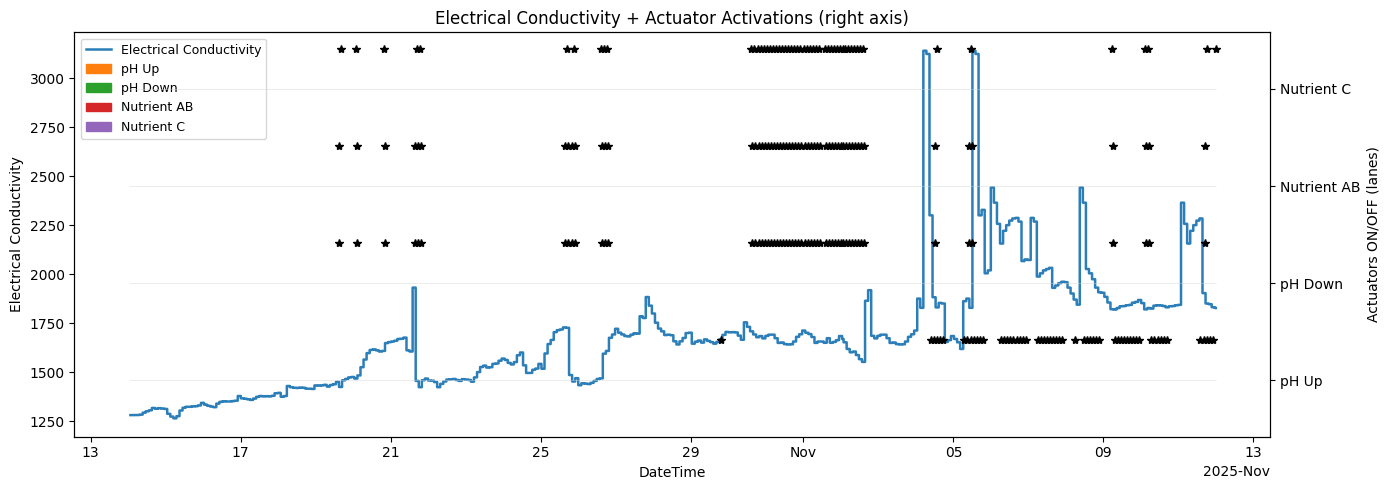

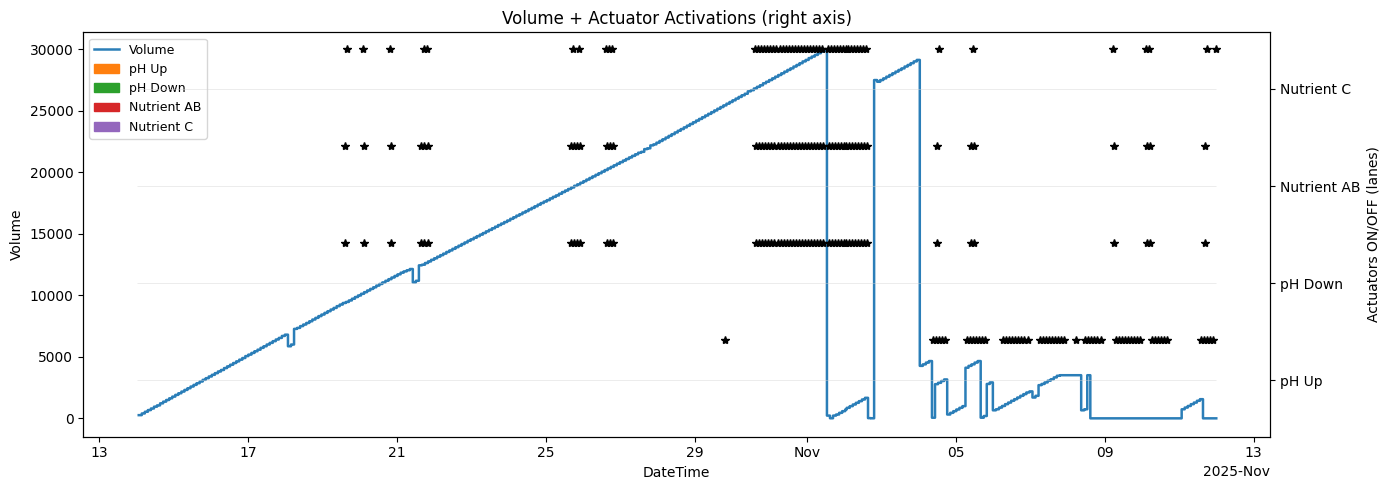

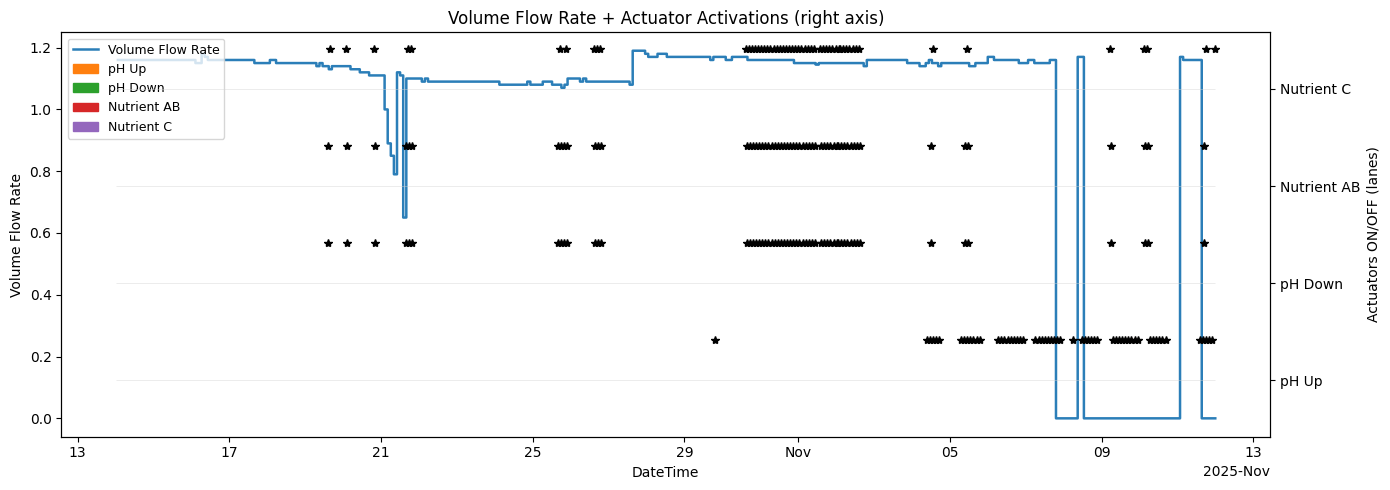

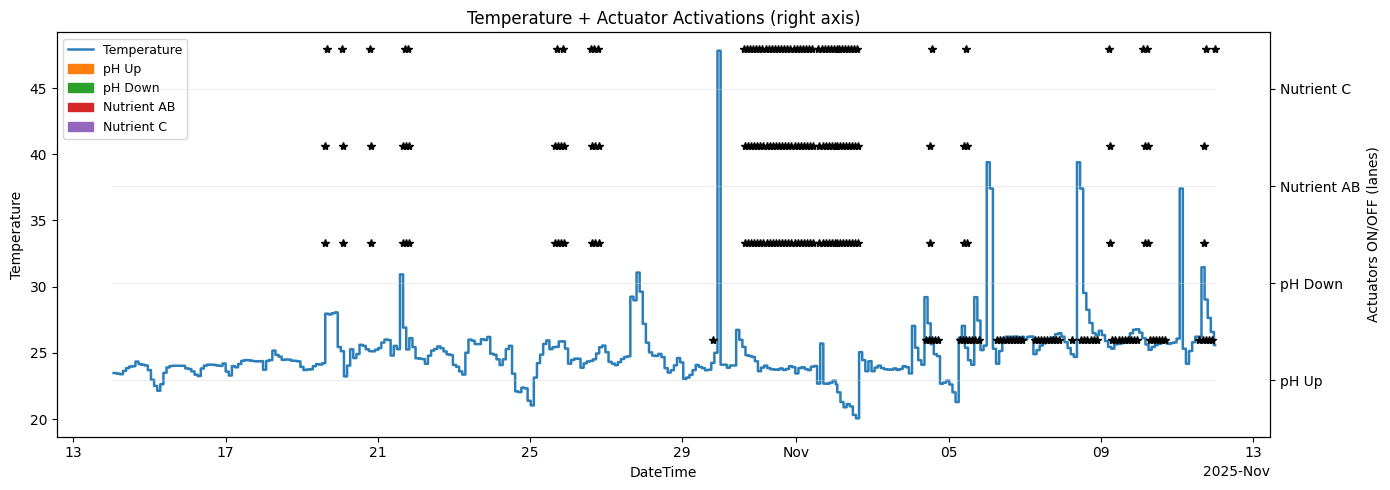

In [104]:
# loop over all nutrient cols and plot with actuators
nutr_cols = ["Electrical Conductivity", "Volume", "Volume Flow Rate", "Temperature"]
nutr_act_cols = ["pH Up Duration", "pH Down Duration", "Nutrient AB Duration", "Nutrient C Duration"]  
for nutr in nutr_cols:
    plot_factor_with_actuators(
        df=merged_nutr_df,
        factor_col=nutr,
        actuator_cols=nutr_act_cols,
        factor_time_col="NutrTime",
        start=None,
        end=None,       
        figsize=(14,5)
    )

#### cumulative actuator activity for each actuator

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/4106052166.py:68: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  grid_dt = pd.date_range(t0, t1, freq=freq)


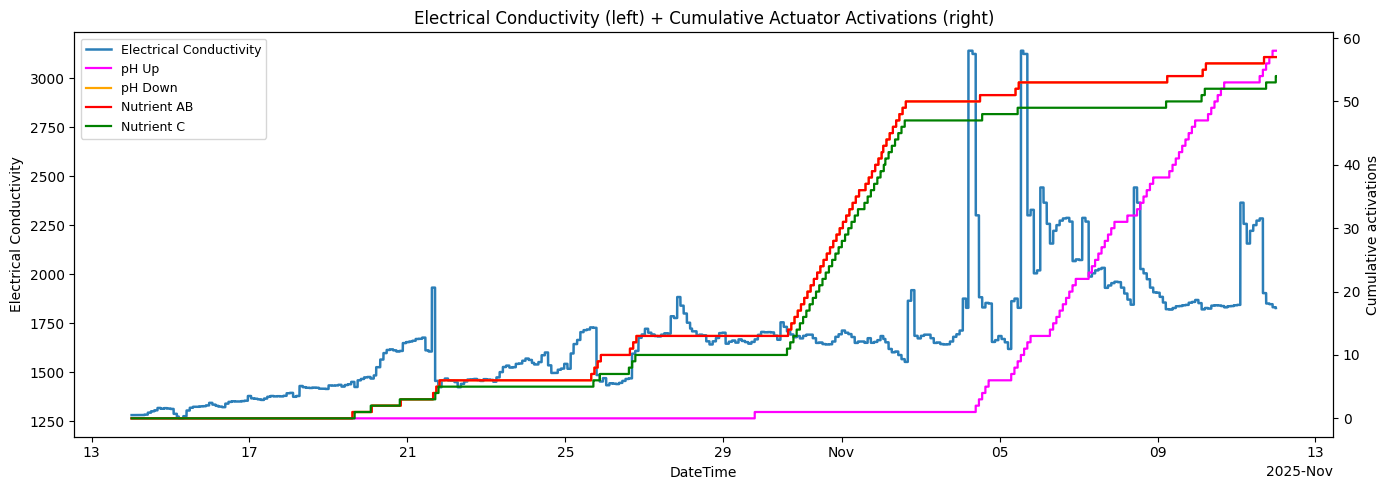

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/4106052166.py:68: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  grid_dt = pd.date_range(t0, t1, freq=freq)


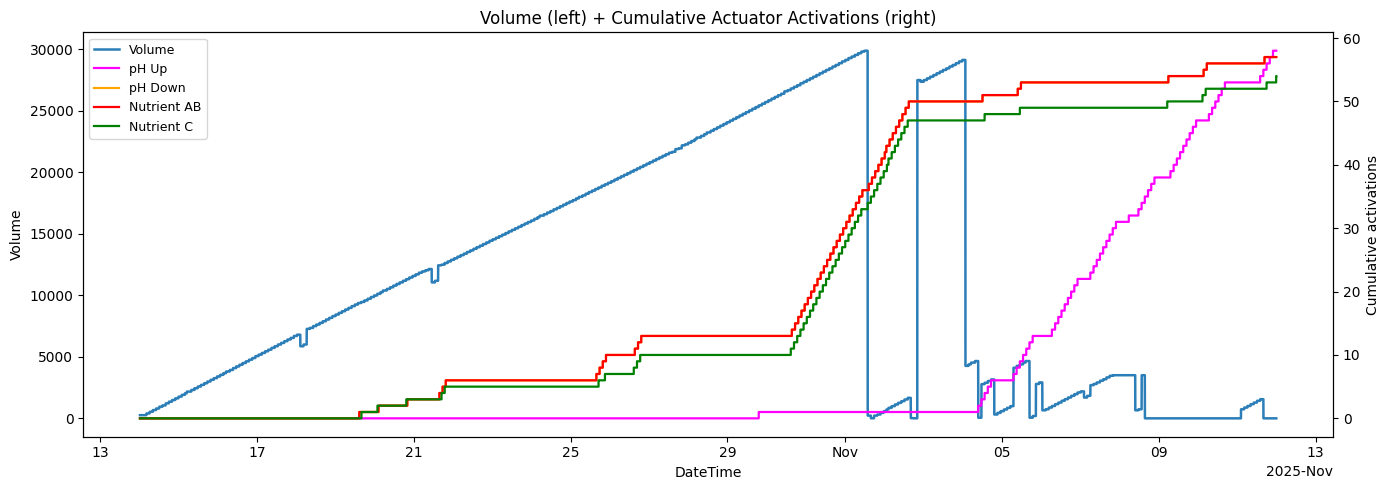

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/4106052166.py:68: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  grid_dt = pd.date_range(t0, t1, freq=freq)


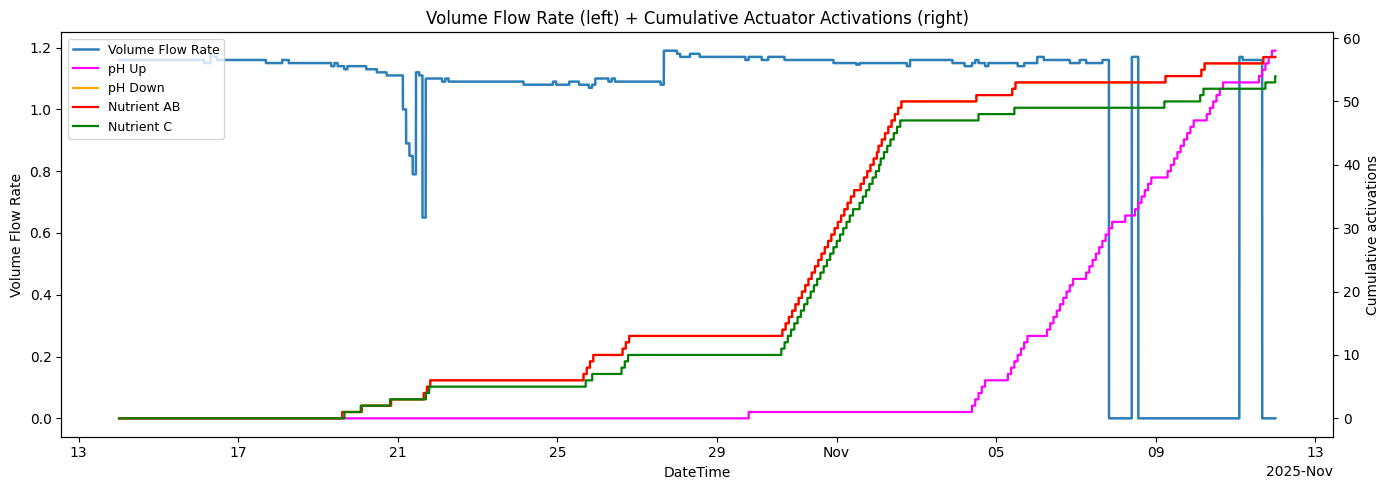

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/4106052166.py:68: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  grid_dt = pd.date_range(t0, t1, freq=freq)


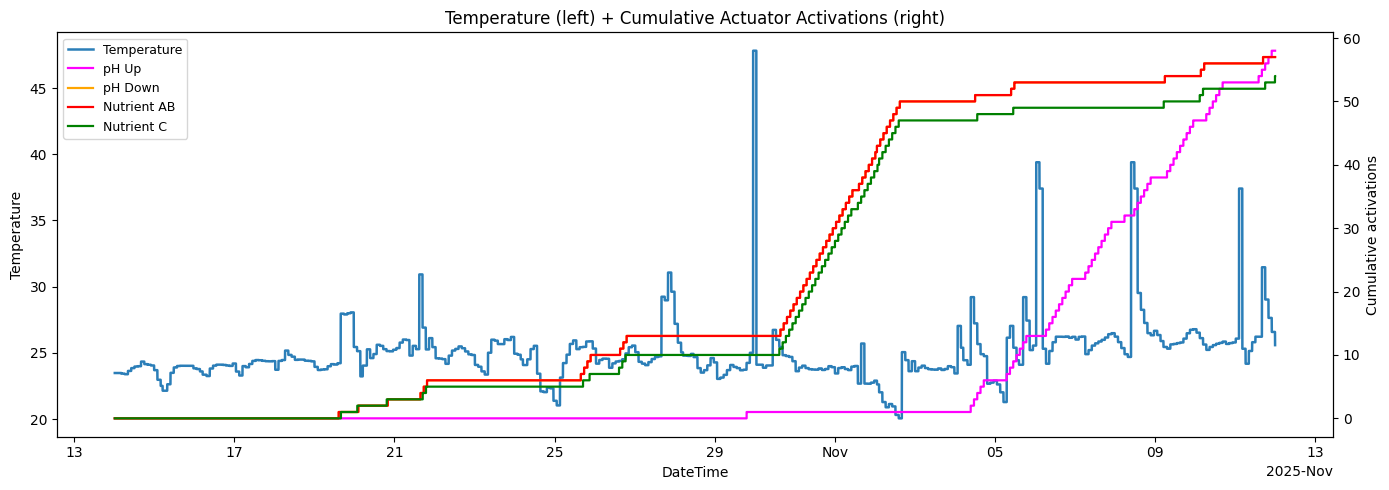

In [ ]:
# cumulative activations for nutrient cols

nutr_cols = ["Electrical Conductivity", "Volume", "Volume Flow Rate", "Temperature"]
nutr_act_cols = ["pH Up Duration", "pH Down Duration", "Nutrient AB Duration", "Nutrient C Duration"]  
for nutr in nutr_cols:
    plot_cumulative_activations(
        df=merged_nutr_df,
        factor_col=nutr,
        act_cols=nutr_act_cols,
        start_date=None,
        end_date=None,
        freq="1S",         
        figsize=(14,5)
    )
    

### zoomed in plots

## Lettuce Weights

In [ ]:
lettuce_weights_mod = lettuce_weights.copy()

# day 0 = 10/14/2025
# day 4 = 10/15, 10/16, 10/17, 10/18
# day 8 = 10/19, 10/20, 10/21, 10/22
# day 12 = 10/23, 10/24, 10/25, 10/26
# day 16 = 10/27, 10/28, 10/29, 10/30
# day 20 = 10/31, 11/1, 11/2, 11/3
# day 24 = 11/4, 11/5, 11/6, 11/7
# day 28 = 11/8, 11/9, 11/10, 11/11
# function to fill datetime column based day 
def fill_dates(row):
    day = row['Day']
    if day == 0:
        return pd.to_datetime('2025-10-14')
    elif day == 4:
        return pd.to_datetime('2025-10-18')
    elif day == 8:
        return pd.to_datetime('2025-10-22')
    elif day == 12:
        return pd.to_datetime('2025-10-26')
    elif day == 16:
        return pd.to_datetime('2025-10-30')
    elif day == 20:
        return pd.to_datetime('2025-11-03')
    elif day == 24:
        return pd.to_datetime('2025-11-07')
    elif day == 28:
        return pd.to_datetime('2025-11-11')
    else:
        return pd.NaT
    
lettuce_weights_mod['DateTime'] = lettuce_weights_mod.apply(fill_dates, axis=1)
lettuce_weights_mod


Day  Median Net Fresh Weight  Target Fresh Weight  Change in Fresh Weight  \
0    0                      4.7                  3.5                     0.0   
1    4                     13.1                  8.8                     8.4   
2    8                     19.8                 22.2                     6.7   
3   12                     27.3                 56.0                     7.5   
4   16                     42.3                 98.8                    15.0   
5   20                     80.8                141.5                    38.5   
6   24                    139.3                184.3                    58.5   
7   28                    219.8                227.0                    80.5   

    DateTime  
0 2025-10-14  
1 2025-10-18  
2 2025-10-22  
3 2025-10-26  
4 2025-10-30  
5 2025-11-03  
6 2025-11-07  
7 2025-11-11

/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/552515277.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_nutr_df = pd.merge_asof(
/var/folders/b2/dv4s0x994dz37s4d7fv56q8r0000gn/T/ipykernel_55539/3081082122.py:62: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  grid_dt = pd.date_range(t0, t1, freq=freq)


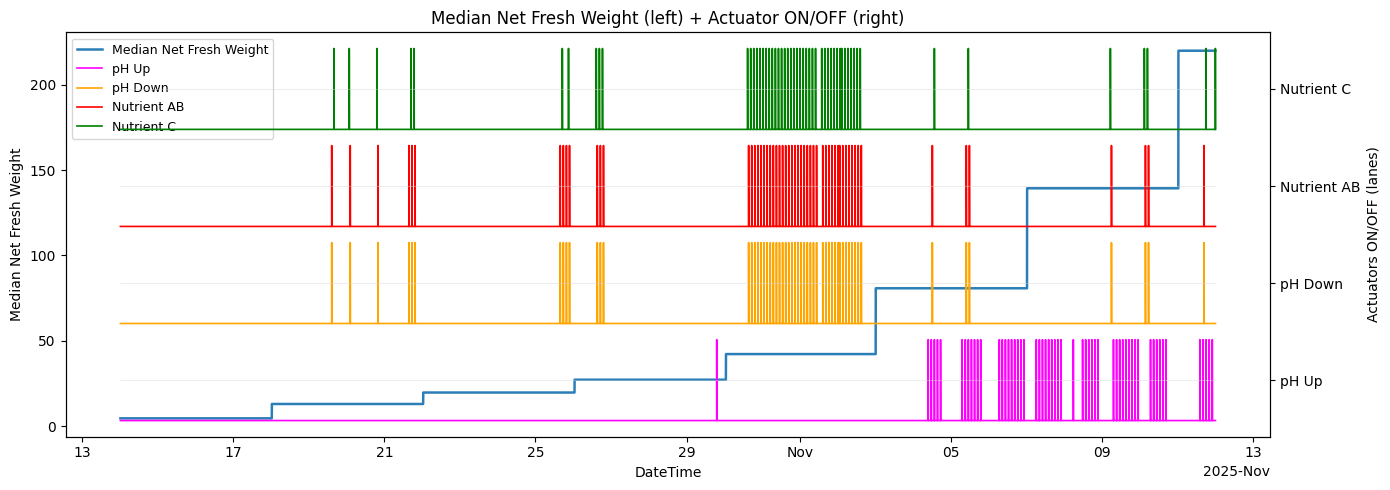

(<Figure size 1400x500 with 2 Axes>,
 <Axes: title={'center': 'Median Net Fresh Weight (left) + Actuator ON/OFF (right)'}, xlabel='DateTime', ylabel='Median Net Fresh Weight'>,
 <Axes: ylabel='Actuators ON/OFF (lanes)'>)

In [ ]:
# plot lettuce median weight overlayed actuator activations 

# join lettuce_weights_mod with merged_nutr_df on DateTime and plot 

factor_col = "Median Net Fresh Weight"
merged_nutr_df = pd.merge_asof(
    merged_nutr_df.sort_values('DateTime'),
    lettuce_weights_mod[['DateTime', factor_col]].sort_values('DateTime'),
    on='DateTime',
    direction='backward'
).fillna(method='bfill')

#  and plot
plot_with_actuators(
    df=merged_nutr_df,
    factor_col=factor_col,
    act_cols=nutr_act_cols,
    start_date=None,
    end_date=None,
    freq="1S",         
    figsize=(14,5)
)

# Time Series Regression and SVR

### Load Data 

In [10]:
import pandas as pd

# function to load lettuce weight data into dataframe
def load_lettuce_weights(file_path='../Data/Lettuce_FW_EC_Tracker_v3_2_.xlsx'):
    weights_df = pd.read_excel(file_path, sheet_name='Data_Collection', header=0)
    weights_df = weights_df.drop(columns=['Date'])
    weights_df = weights_df.dropna(how='all')
    return weights_df

def load_mean_nutr_env_df():
    """Join mean environmental and nutrient data on 'Days' column."""
    return pd.merge(mean_env_df.rename(columns={'Temperature': 'Temp (env)'}), mean_nutr_df.rename(columns={'Temperature': 'Temp (nutr)'}), on='Day')


In [11]:
reg_df = (load_lettuce_weights().merge(load_mean_nutr_env_df(), on='Day')
          .drop(columns=['Median Fresh Weight (g)', 'Average Fresh Weight (g)', 'New Fresh Weight (g)'])
)

target = "Total Fresh Weight (g)"

feature_cols = [
    "Carbon Dioxide",
    "Temp (env)",
    "Humidity",
    "Pressure",
    "Electrical Conductivity",
    "Volume",
    "Temp (nutr)",
    "Volume Flow Rate"
]

for lag in [1, 2]:
        reg_df[f"weight_lag_{lag}"] = (
        reg_df.groupby("Plant-ID")[target].shift(lag)
    )

reg_df = reg_df.dropna().reset_index(drop=True)

# reg_df columns
# Index(['Day', 'Plant-ID', 'Total Fresh Weight (g)', 'Baseline (g)',
#        'Carbon Dioxide', 'Temp (env)', 'Humidity', 'Pressure',
#        'Electrical Conductivity', 'Volume', 'Temp (nutr)', 'Volume Flow Rate',
#        'weight_lag_1', 'weight_lag_2'],
#       dtype='object')

# rename all columns to lower case, remove parentheses  and replace spaces with snake case
reg_df.columns = (reg_df.columns.str.lower()
    .str.replace('(', '', regex=False)
    .str.replace(')', '', regex=False)
    .str.replace(' ', '_')
)

reg_df.head(30)

day  plant-id  total_fresh_weight_g  baseline_g  carbon_dioxide  \
0    8.0       6.0                  40.1       25.22      514.051020   
1    8.0       2.0                  43.4       25.22      514.051020   
2    8.0       8.0                  43.6       25.22      514.051020   
3    8.0       1.0                  44.3       25.22      514.051020   
4    8.0       6.0                  45.0       25.22      514.051020   
5    8.0       5.0                  45.1       25.22      514.051020   
6    8.0       4.0                  46.0       25.22      514.051020   
7    8.0       7.0                  46.2       25.22      514.051020   
8    8.0       9.0                  46.8       25.22      514.051020   
9    8.0       3.0                  49.2       25.22      514.051020   
10  12.0       6.0                  47.0       25.22      503.693878   
11  12.0       5.0                  51.0       25.22      503.693878   
12  12.0       1.0                  52.0       25.22      503.693878   
13  12.0       8.0                  52.0       25.22      503.693878   
14  12.0       7.0                  52.0       25.22      503.693878   
15  12.0       2.0                  53.0       25.22      503.693878   
16  12.0       9.0                  53.0       25.22      503.693878   
17  12.0       4.0                  55.0       25.22      503.693878   
18  12.0      10.0                  55.0       25.22      503.693878   
19  12.0       3.0                  58.0       25.22      503.693878   
20  16.0       6.0                  61.0       25.22      496.816327   
21  16.0       5.0                  62.0       25.22      496.816327   
22  16.0       1.0                  66.0       25.22      496.816327   
23  16.0       7.0                  66.0       25.22      496.816327   
24  16.0       9.0                  67.0       25.22      496.816327   
25  16.0       8.0                  68.0       25.22      496.816327   
26  16.0       2.0                  71.0       25.22      496.816327   
27  16.0       3.0                  75.0       25.22      496.816327   
28  16.0       4.0                  76.0       25.22      496.816327   
29  16.0      10.0                  70.0       25.22      496.816327   

     temp_env   humidity      pressure  electrical_conductivity        volume  \
0   22.520816  65.247347  99282.511633              1521.816327  11551.277959   
1   22.520816  65.247347  99282.511633              1521.816327  11551.277959   
2   22.520816  65.247347  99282.511633              1521.816327  11551.277959   
3   22.520816  65.247347  99282.511633              1521.816327  11551.277959   
4   22.520816  65.247347  99282.511633              1521.816327  11551.277959   
5   22.520816  65.247347  99282.511633              1521.816327  11551.277959   
6   22.520816  65.247347  99282.511633              1521.816327  11551.277959   
7   22.520816  65.247347  99282.511633              1521.816327  11551.277959   
8   22.520816  65.247347  99282.511633              1521.816327  11551.277959   
9   22.520816  65.247347  99282.511633              1521.816327  11551.277959   
10  21.764694  62.327755  99235.894082              1551.622449  17751.971224   
11  21.764694  62.327755  99235.894082              1551.622449  17751.971224   
12  21.764694  62.327755  99235.894082              1551.622449  17751.971224   
13  21.764694  62.327755  99235.894082              1551.622449  17751.971224   
14  21.764694  62.327755  99235.894082              1551.622449  17751.971224   
15  21.764694  62.327755  99235.894082              1551.622449  17751.971224   
16  21.764694  62.327755  99235.894082              1551.622449  17751.971224   
17  21.764694  62.327755  99235.894082              1551.622449  17751.971224   
18  21.764694  62.327755  99235.894082              1551.622449  17751.971224   
19  21.764694  62.327755  99235.894082              1551.622449  17751.971224   
20  22.316327  53.725918  99111.638367              1699.387755  24206.

In [13]:
# save reg_df as csv
reg_df.drop(columns=['day', 'plant-id', 'baseline_g']).to_csv('../Data/regression_data.csv', index=False)


### Time Series OLS

In [27]:
import statsmodels.formula.api as smf

# drop non-predictors

col_to_drop = ['baseline_g', 'day', 'plant-id']
model_df = reg_df.drop(columns=col_to_drop)

model_1 = smf.ols(
    formula="""
        total_fresh_weight_g
        ~ carbon_dioxide
        + temp_env
        + humidity
        + pressure
        + electrical_conductivity
        + volume
        + temp_nutr
        + volume_flow_rate
        + weight_lag_1
        + weight_lag_2
    """,
    data=model_df
).fit()

print(model_1.summary())


                             OLS Regression Results                             
Dep. Variable:     total_fresh_weight_g   R-squared:                       0.996
Model:                              OLS   Adj. R-squared:                  0.996
Method:                   Least Squares   F-statistic:                     2058.
Date:                  Fri, 06 Feb 2026   Prob (F-statistic):           3.45e-61
Time:                          10:30:55   Log-Likelihood:                -171.34
No. Observations:                    60   AIC:                             358.7
Df Residuals:                        52   BIC:                             375.4
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Interc

* Humidity and water temperature have strongest positively associated features with lettuce weight. 
* However, examining the confidence interval tells us that the coefficient of water temperature could be zero. We are 95% confident that humidity is a positive predictor of lettuce weight. 
* Adiditonally there is strong multicollinearity
* r sqaured and rmse is good 
* remove insignificant p values from report 
* add time series neural network model and compare results to OLS

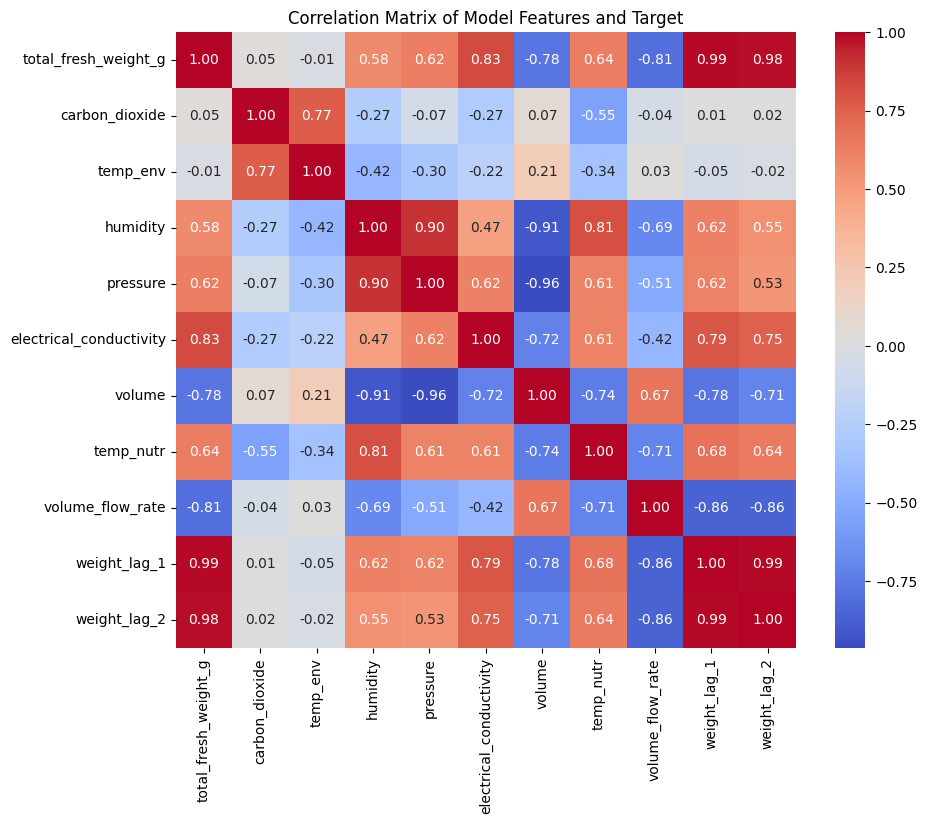

In [ ]:
# correlation matrix of model_df
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(model_df.drop[columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Model Features and Target")
plt.show()


In [31]:
# check vif of model 1
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = model_df.drop(columns=["total_fresh_weight_g"])

vif = pd.Series(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns
).sort_values(ascending=False)

vif

/Users/gerardogutierrez/Library/Python/3.9/lib/python/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


carbon_dioxide                    inf
temp_env                          inf
humidity                          inf
pressure                          inf
electrical_conductivity           inf
volume                            inf
temp_nutr                         inf
volume_flow_rate                  inf
weight_lag_1               189.993586
weight_lag_2               119.935774
dtype: float64

In [108]:
model_df

total_fresh_weight_g  carbon_dioxide   temp_env   humidity      pressure  \
0                   40.1      514.051020  22.520816  65.247347  99282.511633   
1                   43.4      514.051020  22.520816  65.247347  99282.511633   
2                   43.6      514.051020  22.520816  65.247347  99282.511633   
3                   44.3      514.051020  22.520816  65.247347  99282.511633   
4                   45.0      514.051020  22.520816  65.247347  99282.511633   
5                   45.1      514.051020  22.520816  65.247347  99282.511633   
6                   46.0      514.051020  22.520816  65.247347  99282.511633   
7                   46.2      514.051020  22.520816  65.247347  99282.511633   
8                   46.8      514.051020  22.520816  65.247347  99282.511633   
9                   49.2      514.051020  22.520816  65.247347  99282.511633   
10                  47.0      503.693878  21.764694  62.327755  99235.894082   
11                  51.0      503.693878  21.764694  62.327755  99235.894082   
12                  52.0      503.693878  21.764694  62.327755  99235.894082   
13                  52.0      503.693878  21.764694  62.327755  99235.894082   
14                  52.0      503.693878  21.764694  62.327755  99235.894082   
15                  53.0      503.693878  21.764694  62.327755  99235.894082   
16                  53.0      503.693878  21.764694  62.327755  99235.894082   
17                  55.0      503.693878  21.764694  62.327755  99235.894082   
18                  55.0      503.693878  21.764694  62.327755  99235.894082   
19                  58.0      503.693878  21.764694  62.327755  99235.894082   
20                  61.0      496.816327  22.316327  53.725918  99111.638367   
21                  62.0      496.816327  22.316327  53.725918  99111.638367   
22                  66.0      496.816327  22.316327  53.725918  99111.638367   
23                  66.0      496.816327  22.316327  53.725918  99111.638367   
24                  67.0      496.816327  22.316327  53.725918  99111.638367   
25                  68.0      496.816327  22.316327  53.725918  99111.638367   
26                  71.0      496.816327  22.316327  53.725918  99111.638367   
27                  75.0      496.816327  22.316327  53.725918  99111.638367   
28                  76.0      496.816327  22.316327  53.725918  99111.638367   
29                  70.0      496.816327  22.316327  53.725918  99111.638367   
30                  91.0      532.357143  22.804490  52.372857  99187.103673   
31                  95.0      532.357143  22.804490  52.372857  99187.103673   
32                 102.0      532.357143  22.804490  52.372857  99187.103673   
33                 104.0      532.357143  22.804490  52.372857  99187.103673   
34                 104.0      532.357143  22.804490  52.372857  99187.103673   
35                 108.0      532.357143  22.804490  52.372857  99187.103673   
36                 109.0      532.357143  22.804490  52.372857  99187.103673   
37                 115.0      532.357143  22.804490  52.372857  99187.103673   
38                 117.0      532.357143  22.804490  52.372857  99187.103673   
39                 119.0      532.357143  22.804490  52.372857  99187.103673   
40                 149.0      500.326531  22.005102  67.333265  99373.720000   
41                 151.0      500.326531  22.005102  67.333265  99373.720000   
42                 161.0      500.326531  22.005102  67.333265  99373.720000   
43                 161.0      500.326531  22.005102  67.333265  99373.720000   
44                 163.0      500.326531  22.005102  67.333265  99373.720000   
45                 166.0      500.326531  22.005102  67.333265  99373.720000   
46                 167.0      500.326531  22.005102  67.333265  99373.720000   
47                 178.0      500.326531  22.005102  67.333265  99373.720000   
48                 179.0      500.326531  22.005102  67.333265  99373.720000   
49  

Below we are dropping volume since it is not a statistically significant predictor of lettuce weight. 

In [30]:
# model 2 

import statsmodels.formula.api as smf

# drop non-predictors

col_to_drop = ['baseline_g', 'day', 'plant-id', 'carbon_dioxide']
model2_df = reg_df.drop(columns=col_to_drop)

model_2 = smf.ols(
    formula="""
        total_fresh_weight_g
        ~ temp_env
        + humidity
        + pressure
        + electrical_conductivity
        + temp_nutr
        + volume
        + volume_flow_rate
        + weight_lag_1
        + weight_lag_2
    """,
    data=model2_df
).fit()

print(model_2.summary())


                             OLS Regression Results                             
Dep. Variable:     total_fresh_weight_g   R-squared:                       0.996
Model:                              OLS   Adj. R-squared:                  0.996
Method:                   Least Squares   F-statistic:                     2058.
Date:                  Fri, 06 Feb 2026   Prob (F-statistic):           3.45e-61
Time:                          10:35:19   Log-Likelihood:                -171.34
No. Observations:                    60   AIC:                             358.7
Df Residuals:                        52   BIC:                             375.4
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Interc

#### svm

In [32]:
# --- Time Series Support Vector Regression (SVR) ---

import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

# -------------------------------
# 1. Prepare modeling dataframe
# -------------------------------
svm_df = reg_df.copy()

# Drop columns we do NOT want SVR to see
svm_df = svm_df.drop(columns=["baseline_g", "plant-id"])

# Drop rows where lags are missing
svm_df = svm_df.dropna(subset=["weight_lag_1"])

# -------------------------------
# 2. Define features and target
# -------------------------------
X_cols = [
    "weight_lag_1",
    "carbon_dioxide",
    "temp_env",
    "humidity",
    "pressure",
    "electrical_conductivity",
    "temp_nutr",
    "volume_flow_rate",
]

X = svm_df[X_cols]
y = svm_df["total_fresh_weight_g"]

# -------------------------------
# 3. train/test split
# -------------------------------
train_mask = svm_df["day"] <= 20
test_mask  = svm_df["day"] > 20

X_train = X.loc[train_mask]
X_test  = X.loc[test_mask]
y_train = y.loc[train_mask]
y_test  = y.loc[test_mask]

# -------------------------------
# 4. Feature scaling (MANDATORY)
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# -------------------------------
# 5. Fit SVR model
# -------------------------------
svr = SVR(
    kernel="rbf",
    C=10.0,
    epsilon=0.1,
    gamma="scale"
)

svr.fit(X_train_scaled, y_train)

# -------------------------------
# 6. Evaluate performance
# -------------------------------
preds = svr.predict(X_test_scaled)

print("SVR Results")
print("------------")
print("MAE:", mean_absolute_error(y_test, preds))
print("R² :", r2_score(y_test, preds))


SVR Results
------------
MAE: 131.91502221236422
R² : -11.564780469134009


In [34]:
# --- Time Series Linear SVR on total weight (same target) ---
# Assumes you already have:
#   - reg_df with snake_case columns
#   - weight_lag_1 (and optionally weight_lag_2) already created
#   - day column present for time split

import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

# -------------------------------
# 1) Prepare modeling dataframe
# -------------------------------
df = reg_df.copy()

# Keep only rows where required lags exist
df = df.dropna(subset=["weight_lag_1"])  # add "weight_lag_2" if you use it

# Optional: drop identifiers / columns you don't want as predictors
# (Keep 'day' only for splitting; do NOT include it in X unless you explicitly want time as a feature)
drop_cols = [c for c in ["plant_id", "baseline_g"] if c in df.columns]
df = df.drop(columns=drop_cols, errors="ignore")

# -------------------------------
# 2) Define features and target
# -------------------------------
target = "total_fresh_weight_g"

X_cols = [
    "carbon_dioxide",
    "temp_env",
    "humidity",
    "pressure",
    "electrical_conductivity",
    "volume",
    "temp_nutr",
    "volume_flow_rate",
    "weight_lag_1",
    # "weight_lag_2",  # uncomment if you want it
]

# Safety check: ensure columns exist
missing = [c for c in X_cols + [target, "day"] if c not in df.columns]
if missing:
    raise KeyError(f"Missing columns in df: {missing}")

X = df[X_cols]
y = df[target]

# -------------------------------
# 3) Time-aware train/test split
# -------------------------------
train_mask = df["day"] <= 20
test_mask  = df["day"] > 20

X_train = X.loc[train_mask]
X_test  = X.loc[test_mask]
y_train = y.loc[train_mask]
y_test  = y.loc[test_mask]

# -------------------------------
# 4) Scale features (VERY important for SVR)
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# -------------------------------
# 5) Fit Linear SVR
# -------------------------------
svr_linear = SVR(
    kernel="linear",
    C=1.0,        # try 0.1, 1, 10
    epsilon=0.1   # try 0.01, 0.1, 1
)

svr_linear.fit(X_train_scaled, y_train)

# -------------------------------
# 6) Evaluate
# -------------------------------
preds = svr_linear.predict(X_test_scaled)

print("Linear SVR Results (total weight)")
print("----------------------------------")
print("MAE:", mean_absolute_error(y_test, preds))
print("R² :", r2_score(y_test, preds))

# Optional: quick sanity check on prediction range
print("\nActual y_test range:", (float(y_test.min()), float(y_test.max())))
print("Preds  range       :", (float(preds.min()), float(preds.max())))


Linear SVR Results (total weight)
----------------------------------
MAE: 114.12664349024494
R² : -8.918806874999738

Actual y_test range: (149.0, 258.0)
Preds  range       : (69.79444149266139, 104.20246443230582)


In [35]:
svr_linear.coef_

array([[ 4.09040758,  1.7631977 , -2.91406954, -0.54919346,  1.78655331,
         1.07138362, -5.37726548,  1.95123104,  8.75478129]])

/Users/gerardogutierrez/Library/Python/3.9/lib/python/site-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


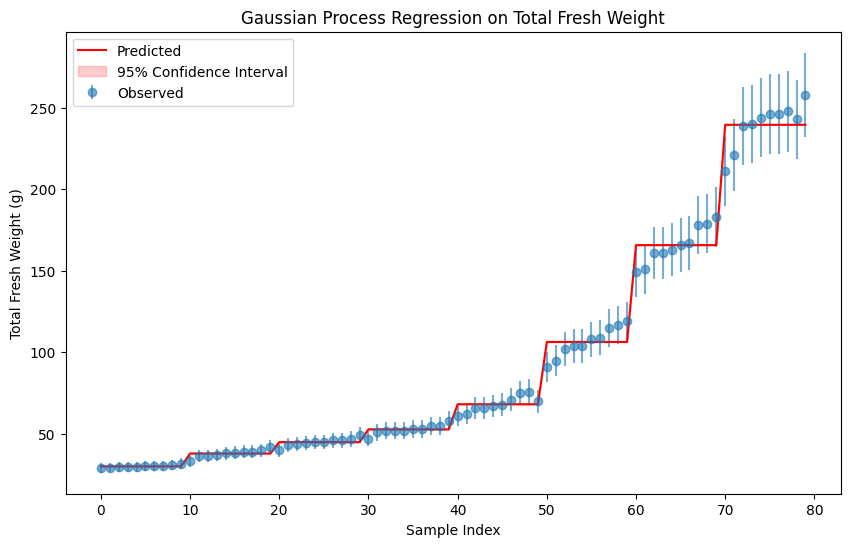

In [61]:
# rbf kernel regression model with Total Fresh Weight (g) as target
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
X = reg_df.drop(columns=['Day', 'Plant-ID', 'Total Fresh Weight (g)', 'Baseline (g)'])
y = reg_df['Total Fresh Weight (g)']
# Define kernel: constant * RBF
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
# Create GaussianProcessRegressor object
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)
# Fit to data
gp.fit(X, y)
# Make predictions
y_pred, sigma = gp.predict(X, return_std=True) 
# Plot results
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(y)), y, yerr=0.1*y, fmt='o', label='Observed', alpha=0.6)
plt.plot(range(len(y_pred)), y_pred, 'r-', label='Predicted')
plt.fill_between(range(len(y_pred)), y_pred - 1.96*sigma, y_pred + 1.96*sigma, alpha=0.2, color='r', label='95% Confidence Interval')
plt.xlabel('Sample Index')
plt.ylabel('Total Fresh Weight (g)')
plt.title('Gaussian Process Regression on Total Fresh Weight')
plt.legend()
plt.show()

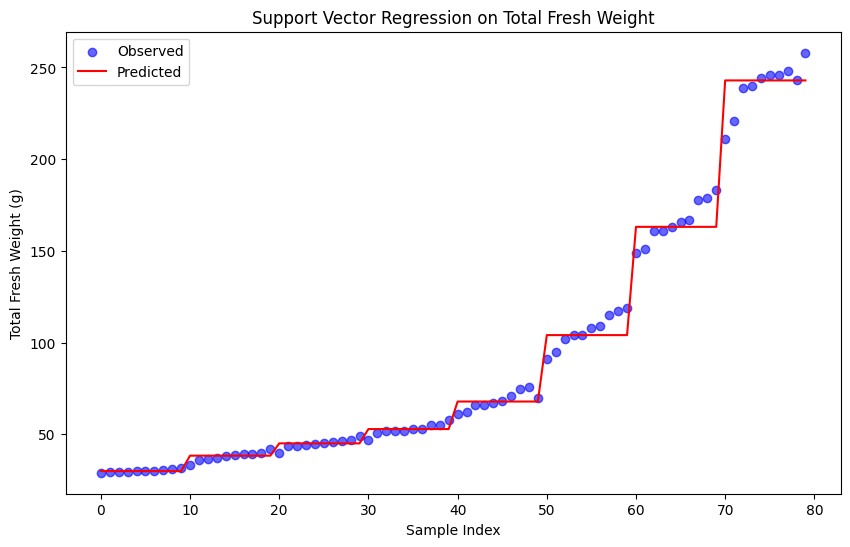

In [62]:
# support vector regression with Total Fresh Weight (g) as target
from sklearn.svm import SVR
X = reg_df.drop(columns=['Day', 'Plant-ID', 'Total Fresh Weight (g)', 'Baseline (g)'])
y = reg_df['Total Fresh Weight (g)']
# Create SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
# Fit to data
svr.fit(X, y)
# Make predictions
y_pred = svr.predict(X)
# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, color='blue', label='Observed', alpha=0.6)
plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Total Fresh Weight (g)')
plt.title('Support Vector Regression on Total Fresh Weight')
plt.legend()
plt.show()

In [66]:
# get feature importances from SVR model using permutation importance
from sklearn.inspection import permutation_importance
result = permutation_importance(svr, X, y, n_repeats=10, random_state=42)
importances = result.importances_mean
std = result.importances_std
indices = np.argsort(importances)[::-1]

<BarContainer object of 8 artists>

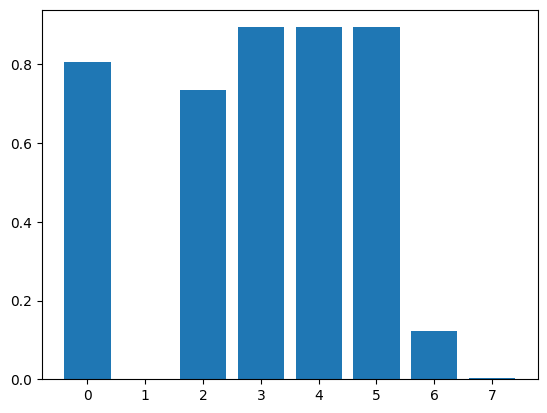

In [69]:
plt.bar(range(len(importances)), importances)